# Telecom Churn Case Study

## Objectives 
 Analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.
     
## Business Understanding
 - If the customer is likely to churn, then firm can increase focus and targetted marketing towards these customers to avoid business loss.
 
 - The aim is to identify patterns which indicate if a customer is likely to churn, which may be used for taking actions such as providing better offers, resolving services related issues quickly etc

## Data Understanding
 - The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9 respectively. 


<font color='red'>NOTE: Please install imblearn package</font>

In [146]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [147]:
#Importing required packages
import numpy as np
import pandas as pd

#Importing display package to use max_columns setting to display all dataframe columns
from IPython.display import display

#Importing Visulaization packages
%matplotlib inline  
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
#Using max_columns setting to display all dataframe columns
pd.options.display.max_columns = None
pd.options.display.max_seq_items = 2000
pd.options.display.max_rows = 4000

 ## Data Loading

In [149]:
#Reading telecom churn data csv file
telecom_churn_data=pd.read_csv("telecom_churn_data.csv",encoding = "ISO-8859-1")

### Let's understand the structure of our dataframe

In [150]:
#Printing the first 5 rows of a dataframe
telecom_churn_data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [151]:
#Printing the shape
print("shape : ",telecom_churn_data.shape)

shape :  (99999, 226)


<b>Observation</b>: Dataset has 99999 rows and 226 columns.

In [152]:
#Describing the data
telecom_churn_data.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [153]:
#Lets check the info of dataset
telecom_churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [154]:
#Lets check the data types 
telecom_churn_data.dtypes

mobile_number                 int64
circle_id                     int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6         object
last_date_of_month_7         object
last_date_of_month_8         object
last_date_of_month_9         object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               

<b>Observation</b>: All columns data types looks good. So no formatting is required.

 ## Data cleaning

#### Lets drop columns which have a single unique value all across the dataset

In [155]:
#Applying nunique to calculate the no of unique values in the dataframe
nunique = telecom_churn_data.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
cols_to_drop

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
       'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6',
       'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'],
      dtype='object')

<b>Observation</b> : 
 - There are 16 columns which are having single unique value all across the rows of a dataset. So dropping them as these columns are not useful for prediction purpose.
 - Also mobile_number column is having unique values in the dataset. It is serving as an Index column for the dataset. We can drop this as well.

In [156]:
#Dropping columns having single unique value 
telecom_churn_data.drop(cols_to_drop,axis=1,inplace=True)
#Dropping mobile_number column
telecom_churn_data.drop(['mobile_number'],axis=1,inplace=True)

In [157]:
#Shape of dataset
telecom_churn_data.shape

(99999, 209)

<b>Observation</b> : There are 209 columns in the dataset

In [158]:
#Lets check for null value columns
null_columns=telecom_churn_data.columns[telecom_churn_data.isnull().any()]
telecom_churn_data[null_columns].isnull().sum()

onnet_mou_6                  3937
onnet_mou_7                  3859
onnet_mou_8                  5378
onnet_mou_9                  7745
offnet_mou_6                 3937
offnet_mou_7                 3859
offnet_mou_8                 5378
offnet_mou_9                 7745
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_ic_mou_8                5378
roam_ic_mou_9                7745
roam_og_mou_6                3937
roam_og_mou_7                3859
roam_og_mou_8                5378
roam_og_mou_9                7745
loc_og_t2t_mou_6             3937
loc_og_t2t_mou_7             3859
loc_og_t2t_mou_8             5378
loc_og_t2t_mou_9             7745
loc_og_t2m_mou_6             3937
loc_og_t2m_mou_7             3859
loc_og_t2m_mou_8             5378
loc_og_t2m_mou_9             7745
loc_og_t2f_mou_6             3937
loc_og_t2f_mou_7             3859
loc_og_t2f_mou_8             5378
loc_og_t2f_mou_9             7745
loc_og_t2c_mou_6             3937
loc_og_t2c_mou

<b>Observation</b> : There are 152 columns which have null values

In [159]:
#Lets check the percentage of null values in the null columns
def missing_perc():
    columns = telecom_churn_data.columns
    percent_missing = telecom_churn_data.isnull().sum() * 100 / len(telecom_churn_data)
    missing_value_df = pd.DataFrame({'column_name': columns,
                                 'percent_missing': percent_missing})
    missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)
    return missing_value_df

In [160]:
missing_perc()

column_name  percent_missing
arpu_3g_6                                arpu_3g_6        74.846748
night_pck_user_6                  night_pck_user_6        74.846748
count_rech_3g_6                    count_rech_3g_6        74.846748
max_rech_data_6                    max_rech_data_6        74.846748
av_rech_amt_data_6              av_rech_amt_data_6        74.846748
total_rech_data_6                total_rech_data_6        74.846748
date_of_last_rech_data_6  date_of_last_rech_data_6        74.846748
count_rech_2g_6                    count_rech_2g_6        74.846748
fb_user_6                                fb_user_6        74.846748
arpu_2g_6                                arpu_2g_6        74.846748
night_pck_user_7                  night_pck_user_7        74.428744
fb_user_7                                fb_user_7        74.428744
count_rech_2g_7                    count_rech_2g_7        74.428744
arpu_2g_7                                arpu_2g_7        74.428744
av_rech_amt_data_7              av_rech_amt_data_7        74.428744
total_rech_data_7                total_rech_data_7        74.428744
arpu_3g_7                                arpu_3g_7        74.428744
max_rech_data_7                    max_rech_data_7        74.428744
count_rech_3g_7                    count_rech_3g_7        74.428744
date_of_last_rech_data_7  date_of_last_rech_data_7        74.428744
night_pck_user_9                  night_pck_user_9        74.077741
total_rech_data_9                total_rech_data_9        74.077741
fb_user_9                                fb_user_9        74.077741
max_rech_data_9                    max_rech_data_9        74.077741
date_of_last_rech_data_9  date_of_last_rech_data_9        74.077741
arpu_2g_9                                arpu_2g_9        74.077741
av_rech_amt_data_9              av_rech_amt_data_9        74.077741
count_rech_2g_9                    count_rech_2g_9        74.077741
arpu_3g_9                                arpu_3g_9        74.077741
count_rech_3g_9                    count_rech_3g_9        74.077741
night_pck_user_8                  night_pck_user_8        73.660737
date_of_last_rech_data_8  date_of_last_rech_data_8        73.660737
av_rech_amt_data_8              av_rech_amt_data_8        73.660737
arpu_3g_8                                arpu_3g_8        73.660737
count_rech_2g_8                    count_rech_2g_8        73.660737
count_rech_3g_8                    count_rech_3g_8        73.660737
fb_user_8                                fb_user_8        73.660737
max_rech_data_8                    max_rech_data_8        73.660737
arpu_2g_8                                arpu_2g_8        73.660737
total_rech_data_8                total_rech_data_8        73.660737
std_ic_mou_9                          std_ic_mou_9         7.745077
isd_og_mou_9                          isd_og_mou_9         7.745077
std_ic_t2f_mou_9                  std_ic_t2f_mou_9         7.745077
std_ic_t2m_mou_9                  std_ic_t2m_mou_9         7.745077
loc_ic_mou_9                          loc_ic_mou_9         7.745077
spl_og_mou_9                          spl_og_mou_9         7.745077
std_ic_t2t_mou_9                  std_ic_t2t_mou_9         7.745077
og_others_9                            og_others_9         7.745077
onnet_mou_9                            onnet_mou_9         7.745077
loc_ic_t2f_mou_9                  loc_ic_t2f_mou_9         7.745077
loc_ic_t2m_mou_9                  loc_ic_t2m_mou_9         7.745077
std_og_mou_9                          std_og_mou_9         7.745077
loc_ic_t2t_mou_9                  loc_ic_t2t_mou_9         7.745077
roam_ic_mou_9                        roam_ic_mou_9         7.745077
std_og_t2f_mou_9                  std_og_t2f_mou_9         7.745077
loc_og_t2t_mou_9                  loc_og_t2t_mou_9         7.745077
isd_ic_mou_9                          isd_ic_mou_9         7.745077
loc_og_t2m_mou_9                  loc_og_t2m_mou_9         7.745077
std_og_t2m_mou_9           

<b>Observation</b>: There are many columns with around 75% of missing data. Lets analyze these columns before dropping them

In [161]:
#Analyzing night pack user and fb user columns for june month
telecom_churn_data[['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9',
                    'fb_user_6','fb_user_7','fb_user_8','fb_user_9']].describe()

night_pck_user_6  night_pck_user_7  night_pck_user_8  night_pck_user_9  \
count      25153.000000      25571.000000      26339.000000      25922.000000   
mean           0.025086          0.023034          0.020844          0.015971   
std            0.156391          0.150014          0.142863          0.125366   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

          fb_user_6     fb_user_7     fb_user_8     fb_user_9  
count  25153.000000  25571.000000  26339.000000  25922.000000  
mean       0.914404      0.908764      0.890808      0.860968  
std        0.279772      0.287950      0.311885      0.345987  
min        0.000000      0.000000      0.000000      0.000000  
25%        1.000000      1.000000      1.000000      1.000000  
50%        1.000000      1.000000      1.000000      1.000000  
75%        1.000000      1.000000      1.000000      1.000000  
max        1.000000      1.000000      1.000000      1.000000

<b>Observation</b>: These are categorical columns with 0 and 1 as categorical values. Lets not drop this column. Instead we will impute missing values with Unknown and consider 'Unknown' as another category apart from 1 and 0

In [162]:
#Imputing all missing values in categorical columns with Unknown
telecom_churn_data.fillna({'night_pck_user_6':'Unknown', 'night_pck_user_7':'Unknown', 
                           'night_pck_user_8':'Unknown', 'night_pck_user_9':'Unknown'}, inplace=True)
telecom_churn_data.fillna({'fb_user_6': 'Unknown', 'fb_user_7': 'Unknown', 
                           'fb_user_8': 'Unknown', 'fb_user_9': 'Unknown'}, inplace=True)

In [163]:
# Getting the individual value counts for night pack and fb users
print(telecom_churn_data['night_pck_user_6'].value_counts())
print(telecom_churn_data['fb_user_6'].value_counts())

Unknown    74846
0.0        24522
1.0          631
Name: night_pck_user_6, dtype: int64
Unknown    74846
1.0        23000
0.0         2153
Name: fb_user_6, dtype: int64


In [164]:
#Analyzing date of last recharge data and date of last recharge columns
last_rech_date_cols=['date_of_last_rech_data_6','date_of_last_rech_6',
                   'date_of_last_rech_data_7','date_of_last_rech_7',
                   'date_of_last_rech_data_8','date_of_last_rech_8',
                   'date_of_last_rech_data_9','date_of_last_rech_9']
telecom_churn_data[last_rech_date_cols].describe()

date_of_last_rech_data_6 date_of_last_rech_6 date_of_last_rech_data_7  \
count                     25153               98392                    25571   
unique                       30                  30                       31   
top                   6/30/2014           6/30/2014                7/31/2014   
freq                       1888               16960                     1813   

       date_of_last_rech_7 date_of_last_rech_data_8 date_of_last_rech_8  \
count                98232                    26339               96377   
unique                  31                       31                  31   
top              7/31/2014                8/31/2014           8/31/2014   
freq                 17288                     1998               14706   

       date_of_last_rech_data_9 date_of_last_rech_9  
count                     25922               95239  
unique                       30                  30  
top                   9/29/2014           9/29/2014  
freq                       2329               22623

<b>Observation</b>: We will be dropping date_of_last_rech_data columns as 75% of the data is missing.

In [165]:
telecom_churn_data.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7',
                   'date_of_last_rech_data_8','date_of_last_rech_data_9'],axis=1,inplace=True)

#### Let us analyze and impute date_of_last_rech columns

- Missing value percentages for the date_of_last_rech columns
    - date_of_last_rech_9 -<font color=red> 4.76%</font>
    - date_of_last_rech_8 -<font color=red> 3.62%</font>
    - date_of_last_rech_7	-<font color=red> 1.77%</font>	
    - date_of_last_rech_6 -<font color=red> 1.61%</font>
    
- Since the percentage of missing values are very less, imputing them with ffill method should not have significant affect on the final result

In [166]:
#Imputing the date columns with ffill method
telecom_churn_data['date_of_last_rech_6'].fillna(method='ffill', inplace=True)
telecom_churn_data['date_of_last_rech_7'].fillna(method='ffill', inplace=True)
telecom_churn_data['date_of_last_rech_8'].fillna(method='ffill', inplace=True)
telecom_churn_data['date_of_last_rech_9'].fillna(method='ffill', inplace=True)

In [167]:
#Lets check the percentage of null values in the null columns
missing_perc()

column_name  percent_missing
total_rech_data_6      total_rech_data_6        74.846748
av_rech_amt_data_6    av_rech_amt_data_6        74.846748
arpu_3g_6                      arpu_3g_6        74.846748
max_rech_data_6          max_rech_data_6        74.846748
arpu_2g_6                      arpu_2g_6        74.846748
count_rech_2g_6          count_rech_2g_6        74.846748
count_rech_3g_6          count_rech_3g_6        74.846748
arpu_2g_7                      arpu_2g_7        74.428744
total_rech_data_7      total_rech_data_7        74.428744
max_rech_data_7          max_rech_data_7        74.428744
count_rech_3g_7          count_rech_3g_7        74.428744
count_rech_2g_7          count_rech_2g_7        74.428744
av_rech_amt_data_7    av_rech_amt_data_7        74.428744
arpu_3g_7                      arpu_3g_7        74.428744
av_rech_amt_data_9    av_rech_amt_data_9        74.077741
max_rech_data_9          max_rech_data_9        74.077741
total_rech_data_9      total_rech_data_9        74.077741
arpu_3g_9                      arpu_3g_9        74.077741
count_rech_2g_9          count_rech_2g_9        74.077741
count_rech_3g_9          count_rech_3g_9        74.077741
arpu_2g_9                      arpu_2g_9        74.077741
total_rech_data_8      total_rech_data_8        73.660737
arpu_2g_8                      arpu_2g_8        73.660737
max_rech_data_8          max_rech_data_8        73.660737
arpu_3g_8                      arpu_3g_8        73.660737
count_rech_2g_8          count_rech_2g_8        73.660737
av_rech_amt_data_8    av_rech_amt_data_8        73.660737
count_rech_3g_8          count_rech_3g_8        73.660737
std_ic_t2f_mou_9        std_ic_t2f_mou_9         7.745077
std_og_t2m_mou_9        std_og_t2m_mou_9         7.745077
std_ic_mou_9                std_ic_mou_9         7.745077
std_ic_t2m_mou_9        std_ic_t2m_mou_9         7.745077
loc_ic_t2t_mou_9        loc_ic_t2t_mou_9         7.745077
std_og_mou_9                std_og_mou_9         7.745077
std_og_t2f_mou_9        std_og_t2f_mou_9         7.745077
std_ic_t2t_mou_9        std_ic_t2t_mou_9         7.745077
spl_og_mou_9                spl_og_mou_9         7.745077
loc_ic_mou_9                loc_ic_mou_9         7.745077
std_og_t2t_mou_9        std_og_t2t_mou_9         7.745077
isd_og_mou_9                isd_og_mou_9         7.745077
loc_ic_t2m_mou_9        loc_ic_t2m_mou_9         7.745077
spl_ic_mou_9                spl_ic_mou_9         7.745077
loc_ic_t2f_mou_9        loc_ic_t2f_mou_9         7.745077
og_others_9                  og_others_9         7.745077
onnet_mou_9                  onnet_mou_9         7.745077
loc_og_mou_9                loc_og_mou_9         7.745077
ic_others_9                  ic_others_9         7.745077
offnet_mou_9                offnet_mou_9         7.745077
loc_og_t2c_mou_9        loc_og_t2c_mou_9         7.745077
roam_ic_mou_9              roam_ic_mou_9         7.745077
loc_og_t2f_mou_9        loc_og_t2f_mou_9         7.745077
isd_ic_mou_9                isd_ic_mou_9         7.745077
loc_og_t2m_mou_9        loc_og_t2m_mou_9         7.745077
loc_og_t2t_mou_9        loc_og_t2t_mou_9         7.745077
roam_og_mou_9              roam_og_mou_9         7.745077
loc_ic_t2f_mou_8        loc_ic_t2f_mou_8         5.378054
loc_ic_t2t_mou_8        loc_ic_t2t_mou_8         5.378054
loc_ic_t2m_mou_8        loc_ic_t2m_mou_8         5.378054
isd_ic_mou_8                isd_ic_mou_8         5.378054
loc_ic_mou_8                loc_ic_mou_8         5.378054
std_ic_t2m_mou_8        std_ic_t2m_mou_8         5.378054
og_others_8                  og_others_8         5.378054
std_ic_t2f_mou_8        std_ic_t2f_mou_8         5.378054
ic_others_8                  ic_others_8         5.378054
spl_ic_mou_8                spl_ic_mou_8         5.378054
std_ic_t2t_mou_8        std_ic_t2t_mou_8         5.378054
std_ic_mou_8                std_ic_mou_8         5.378054
loc_og_mou_8                loc_og_mou_8         5.378054
offnet_mou_8               

<b>Observation</b> : 
 1. Around 74% of the data is missing from the following columns for all the months. 
    - total_rech_data
    - max_rech_data
    - av_rech_amt_data
    - arpu_2g
    - arpu_3g
    - count_rech_2g
    - count_rech_3g
 2. We will not be dropping total_rech_data and av_rech_amt_data as they are required in calculating HIGH VALUE CUSTOMERS.
    Imputing these two columns with 0 value.
 3. Dropping all other remaining columns.

In [168]:
#Dropping the above mentioned columns except total_rech_data and av_rech_amt_data
telecom_churn_data.drop(['max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9',                         
                         'arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_2g_9',
                         'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_3g_9',
                         'count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_2g_9',
                         'count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','count_rech_3g_9'],axis=1,inplace=True)

 ### Imputing null values with 0 for numeric columns

In [169]:
#Lets replace all null values with 0 for numeric columns
telecom_churn_data.update(telecom_churn_data.select_dtypes(include=[np.number]).fillna(0))

<b>Observation</b>: All numeric columns are imputed with 0.

In [170]:
#Lets check the percentage of null data in the null columns
missing_perc()

column_name  percent_missing
arpu_6                            arpu_6              0.0
total_rech_amt_9        total_rech_amt_9              0.0
ic_others_8                  ic_others_8              0.0
ic_others_9                  ic_others_9              0.0
total_rech_num_6        total_rech_num_6              0.0
total_rech_num_7        total_rech_num_7              0.0
total_rech_num_8        total_rech_num_8              0.0
total_rech_num_9        total_rech_num_9              0.0
total_rech_amt_6        total_rech_amt_6              0.0
total_rech_amt_7        total_rech_amt_7              0.0
total_rech_amt_8        total_rech_amt_8              0.0
max_rech_amt_6            max_rech_amt_6              0.0
std_ic_t2m_mou_7        std_ic_t2m_mou_7              0.0
max_rech_amt_7            max_rech_amt_7              0.0
max_rech_amt_8            max_rech_amt_8              0.0
max_rech_amt_9            max_rech_amt_9              0.0
date_of_last_rech_6  date_of_last_rech_6              0.0
date_of_last_rech_7  date_of_last_rech_7              0.0
date_of_last_rech_8  date_of_last_rech_8              0.0
date_of_last_rech_9  date_of_last_rech_9              0.0
last_day_rch_amt_6    last_day_rch_amt_6              0.0
last_day_rch_amt_7    last_day_rch_amt_7              0.0
ic_others_7                  ic_others_7              0.0
ic_others_6                  ic_others_6              0.0
isd_ic_mou_9                isd_ic_mou_9              0.0
isd_ic_mou_8                isd_ic_mou_8              0.0
std_ic_t2m_mou_9        std_ic_t2m_mou_9              0.0
std_ic_t2f_mou_6        std_ic_t2f_mou_6              0.0
std_ic_t2f_mou_7        std_ic_t2f_mou_7              0.0
std_ic_t2f_mou_8        std_ic_t2f_mou_8              0.0
std_ic_t2f_mou_9        std_ic_t2f_mou_9              0.0
std_ic_mou_6                std_ic_mou_6              0.0
std_ic_mou_7                std_ic_mou_7              0.0
std_ic_mou_8                std_ic_mou_8              0.0
std_ic_mou_9                std_ic_mou_9              0.0
total_ic_mou_6            total_ic_mou_6              0.0
total_ic_mou_7            total_ic_mou_7              0.0
total_ic_mou_8            total_ic_mou_8              0.0
total_ic_mou_9            total_ic_mou_9              0.0
spl_ic_mou_6                spl_ic_mou_6              0.0
spl_ic_mou_7                spl_ic_mou_7              0.0
spl_ic_mou_8                spl_ic_mou_8              0.0
spl_ic_mou_9                spl_ic_mou_9              0.0
isd_ic_mou_6                isd_ic_mou_6              0.0
isd_ic_mou_7                isd_ic_mou_7              0.0
last_day_rch_amt_8    last_day_rch_amt_8              0.0
last_day_rch_amt_9    last_day_rch_amt_9              0.0
total_rech_data_6      total_rech_data_6              0.0
monthly_2g_9                monthly_2g_9              0.0
sachet_2g_7                  sachet_2g_7              0.0
sachet_2g_8                  sachet_2g_8              0.0
sachet_2g_9                  sachet_2g_9              0.0
monthly_3g_6                monthly_3g_6              0.0
monthly_3g_7                monthly_3g_7              0.0
monthly_3g_8                monthly_3g_8              0.0
monthly_3g_9                monthly_3g_9              0.0
sachet_3g_6                  sachet_3g_6              0.0
sachet_3g_7                  sachet_3g_7              0.0
sachet_3g_8                  sachet_3g_8              0.0
sachet_3g_9                  sachet_3g_9              0.0
fb_user_6                      fb_user_6              0.0
fb_user_7                      fb_user_7              0.0
fb_user_8                      fb_user_8              0.0
fb_user_9                      fb_user_9              0.0
aon                                  aon              0.0
aug_vbc_3g                    aug_vbc_3g              0.0
jul_vbc_3g                    jul_vbc_3g              0.0
jun_vbc_3g                    jun_vbc_3g              0.0
sachet_2g_6                

<b>Observation</b> : There are no missing columns in the dataset
    
 ## Univariate Analysis and Outlier treatment

In [171]:
#Lets check the columns in dataset
telecom_churn_data.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7',
       'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7',
       'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9',
       'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f

Text(0,0.5,'value')

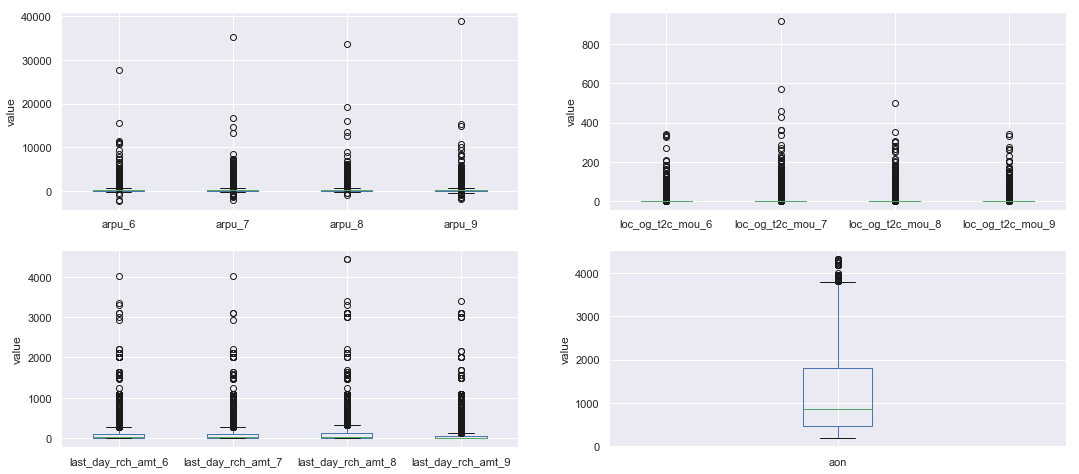

In [172]:
fig, ax = plt.subplots(2,2,figsize=(18,8))
#Box plot for arpu variables
telecom_churn_data.boxplot(['arpu_6', 'arpu_7', 'arpu_8','arpu_9'],ax=ax[0][0])
ax[0][0].set_ylabel('value')
#Box plot for local outgoing t2c minute usage
telecom_churn_data.boxplot(['loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8','loc_og_t2c_mou_9'],ax=ax[0][1])
ax[0][1].set_ylabel('value')
#Box plot for last day recharge amount column
telecom_churn_data.boxplot(['last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'last_day_rch_amt_9'],ax=ax[1][0])
ax[1][0].set_ylabel('value')
#Box plot for age on network column
telecom_churn_data.boxplot(['aon'],ax=ax[1][1])
ax[1][1].set_ylabel('value')

<b>Observation</b>: 
 - From the above plot it is evident that there are outliers in the arpu column but we will not be removing them as we might lose high revenue customers.


 -  Even there are outliers in the loc_og_t2c_mou column, we will not be removing any of the data as t2c denotes calls to its own call center. This can give us a crucial information based on the minutes of call to call center.

   Normally call centre makes a call to customer to inform about any new plans, advertisements, new products etc. But customer    makes a call to call center either to know about new plans, file complaints or express dissatisfaction.

   Customer to call center mins can give us an idea about customer complaints and disappointments. If the minutes are more that indicate the issue resolution might have taken longer time which inturn would have affected customer satisfaction. So we will not be dropping this column as this can determine indirectly customer happiness or dissatisfaction.
   

 - Even though there are outliers in last_day_rch_amnt, we are not removing any of the rows. As last day recharge amount value might impact churning of a customer, lets keep the outliers and analyze this variable further.
 
 
 - From the above graph, it is evident that age on network does not have much outliers. And also age on network looks as important variable in predicting customer churn. Lets check on this variable in our further analysis.

Text(0,0.5,'value')

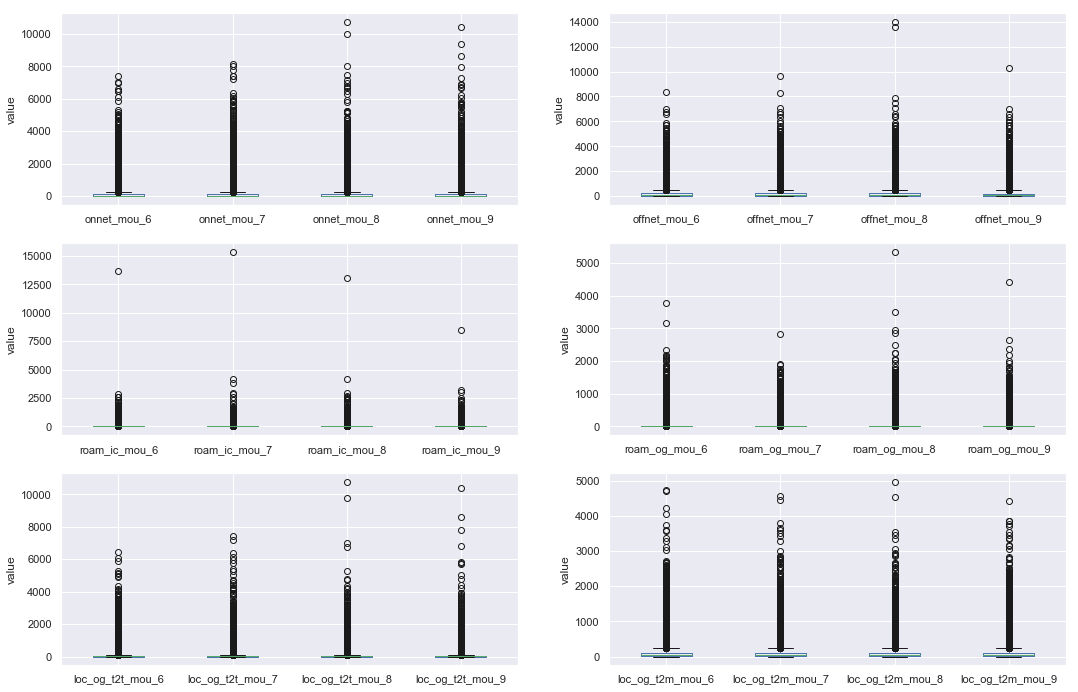

In [173]:
fig, ax = plt.subplots(3,2,figsize=(18,  12))
#Box plot for on network minutes of usage variables
telecom_churn_data.boxplot(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8','onnet_mou_9'],ax=ax[0][0])
ax[0][0].set_ylabel('value')
#Box plot for off network minutes of usage variables
telecom_churn_data.boxplot(['offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8','offnet_mou_9'],ax=ax[0][1])
ax[0][1].set_ylabel('value')
#Box plot for roaming incoming mou variables
telecom_churn_data.boxplot(['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8','roam_ic_mou_9'],ax=ax[1][0])
ax[1][0].set_ylabel('value')
#Box plot for roaming outgoing minute usage variables
telecom_churn_data.boxplot(['roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8','roam_og_mou_9'],ax=ax[1][1])
ax[1][1].set_ylabel('value')
#Box plot for local outgoing t2t minute usage
telecom_churn_data.boxplot(['loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8','loc_og_t2t_mou_9'],ax=ax[2][0])
ax[2][0].set_ylabel('value')
#Box plot for local outgoing t2m minute usage
telecom_churn_data.boxplot(['loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8','loc_og_t2m_mou_9'],ax=ax[2][1])
ax[2][1].set_ylabel('value')

<b>Observation</b>: 
 - There are outliers that are clearly evident from above box plot for on network minute usage. As we can see the outliers are somewhere above 8000 for onnet_mou_8 and onnet_mou_9 columns. Lets remove these records.
 - There are outliers that are clearly evident from above box plot for off network minute usage. As we can see the outliers are somewhere above 6000 for offnet_mou_6, offnet_mou_7, offnet_mou_8 and offnet_mou_9 columns. Lets remove these records.
 - There are outliers that are clearly evident from above box plot for incoming roaming minute usage. As we can see the outliers are somewhere above 3000 for roam_ic_mou_6, roam_ic_mou_7,roam_ic_mou_8 and roam_ic_mou_9 columns. Lets remove these records.
 - There are outliers that are clearly evident from above box plot for outgoing roaming minute usage. As we can see the outliers are somewhere above 2500 for all columns,lets remove these records.
 - There are outliers that are clearly evident from above box plot for local outgoing t2t minute usage. As we can see the outliers are somewhere above 5000 for all local outgoing t2t minute usage columns. Lets remove these records.
 - There are outliers that are clearly evident from above box plot for local outgoing t2m minute usage. As you can see the outliers are somewhere above 3000 for all columns, Lets remove these records

In [174]:
#Removing the outliers for on net mou
telecom_churn_data = telecom_churn_data[telecom_churn_data["onnet_mou_8"] <= 8000 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["onnet_mou_9"] <= 8000 ]
#Removing the outliers for off net mou
telecom_churn_data = telecom_churn_data[telecom_churn_data["offnet_mou_6"] <= 6000 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["offnet_mou_7"] <= 6000 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["offnet_mou_8"] <= 6000 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["offnet_mou_9"] <= 6000 ]
#Removing the outliers for roaming incoming mou
telecom_churn_data = telecom_churn_data[telecom_churn_data["roam_ic_mou_6"] <= 3000 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["roam_ic_mou_7"] <= 3000 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["roam_ic_mou_8"] <= 3000 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["roam_ic_mou_9"] <= 3000 ]
#Removing the outliers for roaming outgoing mou
telecom_churn_data = telecom_churn_data[telecom_churn_data["roam_og_mou_6"] <= 2500 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["roam_og_mou_7"] <= 2500 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["roam_og_mou_8"] <= 2500 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["roam_og_mou_9"] <= 2500 ]
#Removing the outliers for local outgoing t2t mou
telecom_churn_data = telecom_churn_data[telecom_churn_data["loc_og_t2t_mou_6"] <= 5000 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["loc_og_t2t_mou_7"] <= 5000 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["loc_og_t2t_mou_8"] <= 5000 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["loc_og_t2t_mou_9"] <= 5000 ]
#Removing the outliers for local outgoing t2m mou
telecom_churn_data = telecom_churn_data[telecom_churn_data["loc_og_t2m_mou_6"] <= 3000 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["loc_og_t2m_mou_7"] <= 3000 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["loc_og_t2m_mou_8"] <= 3000 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["loc_og_t2m_mou_9"] <= 3000 ]

### We performed box plots for other variables as well and from the observations we decided to remove the outliers from each one of them. We have not added all the code here as we did similar box plot analysis like above.

In [175]:
#Removing the outliers for loc_og_t2f_mou
telecom_churn_data = telecom_churn_data[telecom_churn_data["loc_og_t2f_mou_6"] <= 600 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["loc_og_t2f_mou_7"] <= 600 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["loc_og_t2f_mou_8"] <= 600 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["loc_og_t2f_mou_9"] <= 600 ]
#Removing the outliers for loc_og_mou
telecom_churn_data = telecom_churn_data[telecom_churn_data["loc_og_mou_6"] <= 4500 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["loc_og_mou_7"] <= 4500 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["loc_og_mou_8"] <= 4500 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["loc_og_mou_9"] <= 4500 ]
#Removing the outliers for std_og_t2t_mou
telecom_churn_data = telecom_churn_data[telecom_churn_data["std_og_t2t_mou_6"] <= 6000 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["std_og_t2t_mou_7"] <= 6000 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["std_og_t2t_mou_8"] <= 6000 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["std_og_t2t_mou_9"] <= 6000 ]
#Removing the outliers for std_og_t2m_mou
telecom_churn_data = telecom_churn_data[telecom_churn_data["std_og_t2m_mou_6"] <= 5000 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["std_og_t2m_mou_7"] <= 5000 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["std_og_t2m_mou_8"] <= 5000 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["std_og_t2m_mou_9"] <= 5000 ]
#Removing the outliers for std_og_t2f_mou
telecom_churn_data = telecom_churn_data[telecom_churn_data["std_og_t2f_mou_6"] <= 400 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["std_og_t2f_mou_7"] <= 400 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["std_og_t2f_mou_8"] <= 400 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["std_og_t2f_mou_9"] <= 400 ]
#Removing the outliers for std_og_mou
telecom_churn_data = telecom_churn_data[telecom_churn_data["std_og_mou_6"] <= 6000 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["std_og_mou_7"] <= 6000 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["std_og_mou_8"] <= 6000 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["std_og_mou_9"] <= 6000 ]
#Removing the outliers for isd_og_mou
telecom_churn_data = telecom_churn_data[telecom_churn_data["isd_og_mou_6"] <= 1000 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["isd_og_mou_7"] <= 1000 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["isd_og_mou_8"] <= 1000 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["isd_og_mou_9"] <= 1000 ]
#Removing the outliers for spl_og_mou
telecom_churn_data = telecom_churn_data[telecom_churn_data["spl_og_mou_6"] <= 750 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["spl_og_mou_7"] <= 750 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["spl_og_mou_8"] <= 750 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["spl_og_mou_9"] <= 750 ]
#Removing the outliers for og_others
telecom_churn_data = telecom_churn_data[telecom_churn_data["og_others_6"] <= 100 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["og_others_7"] <= 100 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["og_others_8"] <= 100 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["og_others_9"] <= 100 ]
#Removing the outliers for total_og_mou
telecom_churn_data = telecom_churn_data[telecom_churn_data["total_og_mou_6"] <= 6000 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["total_og_mou_7"] <= 6000 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["total_og_mou_8"] <= 6000 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["total_og_mou_9"] <= 6000 ]
#Removing the outliers for loc_ic_t2t_mou
telecom_churn_data = telecom_churn_data[telecom_churn_data["loc_ic_t2t_mou_6"] <= 4300 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["loc_ic_t2t_mou_7"] <= 4300 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["loc_ic_t2t_mou_8"] <= 4300 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["loc_ic_t2t_mou_9"] <= 4300 ]
#Removing the outliers for loc_ic_t2m_mou
telecom_churn_data = telecom_churn_data[telecom_churn_data["loc_ic_t2m_mou_6"] <= 4000 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["loc_ic_t2m_mou_7"] <= 4000 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["loc_ic_t2m_mou_8"] <= 4000 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["loc_ic_t2m_mou_9"] <= 4000 ]
#Removing the outliers for loc_ic_t2f_mou
telecom_churn_data = telecom_churn_data[telecom_churn_data["loc_ic_t2f_mou_6"] <= 1500 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["loc_ic_t2f_mou_7"] <= 1500 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["loc_ic_t2f_mou_8"] <= 1500 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["loc_ic_t2f_mou_9"] <= 1500 ]
#Removing the outliers for loc_ic_mou
telecom_churn_data = telecom_churn_data[telecom_churn_data["loc_ic_mou_6"] <= 4500 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["loc_ic_mou_7"] <= 4500 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["loc_ic_mou_8"] <= 4500 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["loc_ic_mou_9"] <= 4500 ]
#Removing the outliers for std_ic_t2t_mou
telecom_churn_data = telecom_churn_data[telecom_churn_data["std_ic_t2t_mou_6"] <= 2000 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["std_ic_t2t_mou_7"] <= 2000 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["std_ic_t2t_mou_8"] <= 2000 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["std_ic_t2t_mou_9"] <= 2000 ]
#Removing the outliers for std_ic_t2f_mou
telecom_churn_data = telecom_churn_data[telecom_churn_data["std_ic_t2f_mou_6"] <= 600 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["std_ic_t2f_mou_7"] <= 600 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["std_ic_t2f_mou_8"] <= 600 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["std_ic_t2f_mou_9"] <= 600 ]
#Removing the outliers for std_ic_t2m_mou
telecom_churn_data = telecom_churn_data[telecom_churn_data["std_ic_t2m_mou_6"] <= 3000 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["std_ic_t2m_mou_7"] <= 3000 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["std_ic_t2m_mou_8"] <= 3000 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["std_ic_t2m_mou_9"] <= 3000 ]
#Removing the outliers for std_ic_mou
telecom_churn_data = telecom_churn_data[telecom_churn_data["std_ic_mou_6"] <= 2500 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["std_ic_mou_7"] <= 2500 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["std_ic_mou_8"] <= 2500 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["std_ic_mou_9"] <= 2500 ]
#Removing the outliers for total_ic_mou
telecom_churn_data = telecom_churn_data[telecom_churn_data["total_ic_mou_6"] <= 4500 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["total_ic_mou_7"] <= 4500 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["total_ic_mou_8"] <= 4500 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["total_ic_mou_9"] <= 4500 ]
#Removing the outliers for spl_ic_mou
telecom_churn_data = telecom_churn_data[telecom_churn_data["spl_ic_mou_6"] <= 10 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["spl_ic_mou_7"] <= 10 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["spl_ic_mou_8"] <= 10 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["spl_ic_mou_9"] <= 10 ]
#Removing the outliers for isd_ic_mou
telecom_churn_data = telecom_churn_data[telecom_churn_data["isd_ic_mou_6"] <= 2500 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["isd_ic_mou_7"] <= 2500 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["isd_ic_mou_8"] <= 2500 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["isd_ic_mou_9"] <= 2500 ]
#Removing the outliers for ic_others
telecom_churn_data = telecom_churn_data[telecom_churn_data["ic_others_6"] <= 700 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["ic_others_7"] <= 700 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["ic_others_8"] <= 700 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["ic_others_9"] <= 700 ]
#Removing the outliers for total_rech_num
telecom_churn_data = telecom_churn_data[telecom_churn_data["total_rech_num_6"] <= 150 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["total_rech_num_8"] <= 150 ]
#Removing the outliers for total_rech_amt
telecom_churn_data = telecom_churn_data[telecom_churn_data["total_rech_amt_6"] <= 10000 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["total_rech_amt_7"] <= 10000 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["total_rech_amt_8"] <= 10000 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["total_rech_amt_9"] <= 10000 ]
#Removing the outliers for max_rech_amt
telecom_churn_data = telecom_churn_data[telecom_churn_data["max_rech_amt_6"] <= 2500 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["max_rech_amt_7"] <= 2500 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["max_rech_amt_8"] <= 2500 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["max_rech_amt_9"] <= 2500 ]
#Removing the outliers for vol_2g_mb
telecom_churn_data = telecom_churn_data[telecom_churn_data["vol_2g_mb_6"] <= 6000 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["vol_2g_mb_7"] <= 6000 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["vol_2g_mb_8"] <= 6000 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["vol_2g_mb_9"] <= 6000 ]
#Removing the outliers for vol_3g_mb
telecom_churn_data = telecom_churn_data[telecom_churn_data["vol_3g_mb_6"] <= 20000 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["vol_3g_mb_7"] <= 20000 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["vol_3g_mb_8"] <= 20000 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["vol_3g_mb_9"] <= 20000 ]
#Removing the outliers for vbc_3g
telecom_churn_data = telecom_churn_data[telecom_churn_data["jun_vbc_3g"] <= 8000 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["jul_vbc_3g"] <= 8000 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["aug_vbc_3g"] <= 8000 ]
telecom_churn_data = telecom_churn_data[telecom_churn_data["sep_vbc_3g"] <= 8000 ]

In [176]:
#Lets analyze date of last recharge column
telecom_churn_data[['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']].describe()

date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  \
count                99591               99591               99591   
unique                  30                  31                  31   
top              6/30/2014           7/31/2014           8/31/2014   
freq                 17115               17487               15152   

       date_of_last_rech_9  
count                99591  
unique                  30  
top              9/29/2014  
freq                 23605

<b>Observation</b>: From the above data, we can see that most of the recharges happen on last two or three days of month.

In [177]:
#Lets describe night pack user columns
telecom_churn_data[['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9']].describe()

night_pck_user_6 night_pck_user_7 night_pck_user_8 night_pck_user_9
count             99591            99591            99591            99591
unique                3                3                3                3
top             Unknown          Unknown          Unknown          Unknown
freq              74583            74167            73411            73814

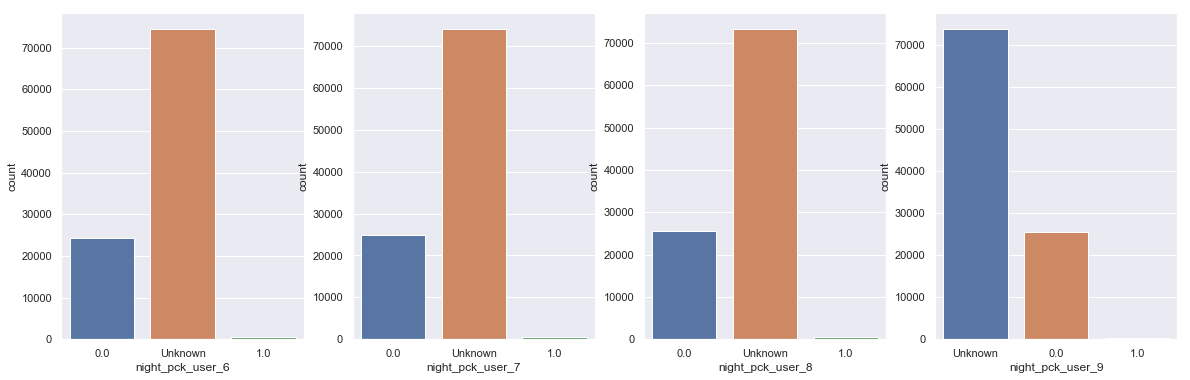

In [178]:
#Lets plot histogram for night_pck_user
sns.set(style="darkgrid")
fig, ax = plt.subplots(1, 4, figsize=(20, 6))
ax1 = sns.countplot(x="night_pck_user_6", data=telecom_churn_data, ax=ax[0])
ax2 = sns.countplot(x="night_pck_user_7", data=telecom_churn_data, ax=ax[1])
ax3 = sns.countplot(x="night_pck_user_8", data=telecom_churn_data, ax=ax[2])
ax4 = sns.countplot(x="night_pck_user_9", data=telecom_churn_data, ax=ax[3])

<b>Observation</b> : Most of the records have Unknown value. Lets check in bivariate analysis to retain this variable or not.

Text(0,0.5,'value')

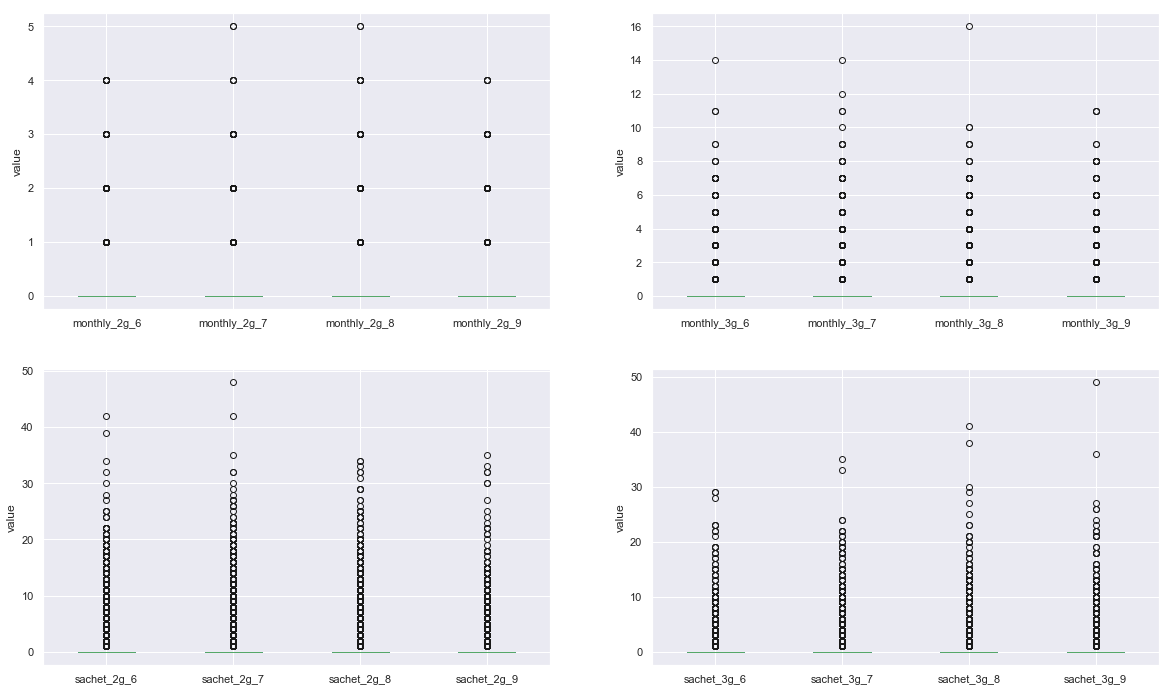

In [179]:
fig, ax = plt.subplots(2,2,figsize=(20,  12))
#Box plot for monthly 2g column
telecom_churn_data.boxplot(['monthly_2g_6','monthly_2g_7','monthly_2g_8','monthly_2g_9'],ax=ax[0][0])
ax[0][0].set_ylabel('value')
#Box plot for monthly 3g column
telecom_churn_data.boxplot(['monthly_3g_6','monthly_3g_7','monthly_3g_8','monthly_3g_9'],ax=ax[0][1])
ax[0][1].set_ylabel('value')
#Box plot for sachet 2g column
telecom_churn_data.boxplot(['sachet_2g_6','sachet_2g_7','sachet_2g_8','sachet_2g_9'],ax=ax[1][0])
ax[1][0].set_ylabel('value')
#Box plot for sachet 3g column
telecom_churn_data.boxplot(['sachet_3g_6','sachet_3g_7','sachet_3g_8','sachet_3g_9'],ax=ax[1][1])
ax[1][1].set_ylabel('value')

<b>Observation</b>: Most of the rows have 0 value. We will retain it for now and check further in our analysis.

In [180]:
#Lets describe fb user columns
telecom_churn_data[['fb_user_6','fb_user_7','fb_user_8','fb_user_9']].describe()

fb_user_6 fb_user_7 fb_user_8 fb_user_9
count      99591     99591     99591     99591
unique         3         3         3         3
top      Unknown   Unknown   Unknown   Unknown
freq       74583     74167     73411     73814

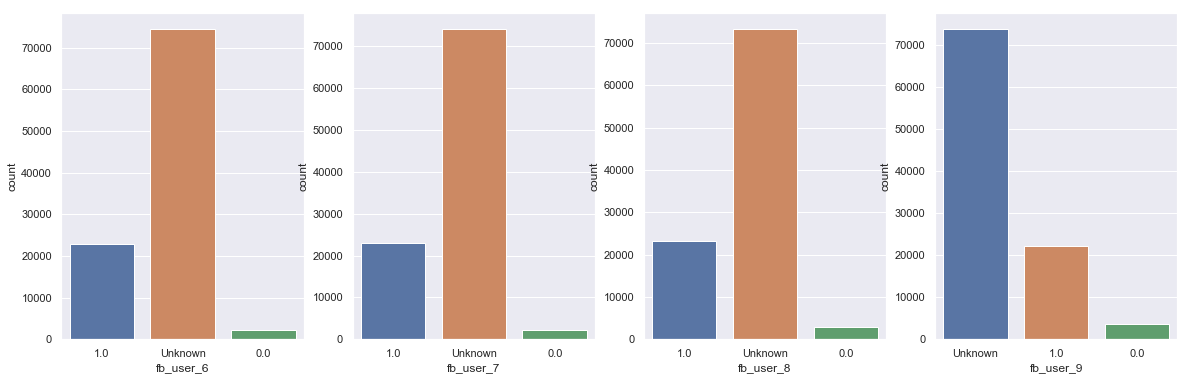

In [181]:
#Lets plot countplot for fb users
sns.set(style="darkgrid")
fig, ax = plt.subplots(1, 4, figsize=(20,6))
ax1 = sns.countplot(x="fb_user_6", data=telecom_churn_data, ax=ax[0])
ax2 = sns.countplot(x="fb_user_7", data=telecom_churn_data, ax=ax[1])
ax3 = sns.countplot(x="fb_user_8", data=telecom_churn_data, ax=ax[2])
ax4 = sns.countplot(x="fb_user_9", data=telecom_churn_data, ax=ax[3])

<b>Observation</b> : Most of the records have Unknown value. Lets check in bivariate analysis to retain this variable or not.

 ## Filter high-value customers
 
We need to predict churn only for the high-value customers. 

Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).After filtering the high-value customers, you should get about 29.9k rows.


In [182]:
#Get total data recharge amount by multiplying total no. of data recharges with average amount of data recharge
telecom_churn_data['total_data_rech_6'] = telecom_churn_data['total_rech_data_6'] * telecom_churn_data['av_rech_amt_data_6']
telecom_churn_data['total_data_rech_7'] = telecom_churn_data['total_rech_data_7'] * telecom_churn_data['av_rech_amt_data_7']

#Add total recharge amount and total data recharge amount
telecom_churn_data['amt_data_6'] = telecom_churn_data['total_rech_amt_6'] + telecom_churn_data['total_data_rech_6']
telecom_churn_data['amt_data_7'] = telecom_churn_data['total_rech_amt_7'] + telecom_churn_data['total_data_rech_7']

#Calculate average recharge amount for good phase months Jun and July.
telecom_churn_data['avg_rech_amt_good_phase'] = telecom_churn_data[['amt_data_6', 'amt_data_7']].mean(axis=1)

In [183]:
#Getting 70th percentile of the average recharge amount in the first two months.
avg_rech_amt_70=telecom_churn_data.avg_rech_amt_good_phase.quantile(.7)
avg_rech_amt_70

475.5

In [184]:
#Filter high value customers whose recharge amount is greater than or equal to 70th percentile of avg recharge amount
telecom_churn_data = telecom_churn_data[(telecom_churn_data.avg_rech_amt_good_phase >= avg_rech_amt_70)]
telecom_churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29891 entries, 0 to 99997
Columns: 190 entries, arpu_6 to avg_rech_amt_good_phase
dtypes: float64(145), int64(33), object(12)
memory usage: 43.6+ MB


In [185]:
#Dropping avg_rech_amt_good_phase and intermediate columns
telecom_churn_data.drop(['avg_rech_amt_good_phase','amt_data_6','amt_data_7','total_data_rech_6','total_data_rech_7'], inplace=True, axis=1)

In [186]:
telecom_churn_data.shape

(29891, 185)

 ## <font color='green'> We have got a total of 29891 high value customers which is close to expected value of 29.9k rows</font>

  ## Tag churners and remove attributes of the churn phase
  
  Tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

total_ic_mou_9

total_og_mou_9

vol_2g_mb_9

vol_3g_mb_9

In [187]:
#Creating total calls minutes of usgae variable for month 9 by adding incoming and outgoing calls mou
telecom_churn_data['total_calls_mou_9']=telecom_churn_data['total_ic_mou_9']+telecom_churn_data['total_og_mou_9']
#Creating total vol consumed in mb for month 9 by adding 2g and 3g vol
telecom_churn_data['total_vol_mb_9']=telecom_churn_data['vol_2g_mb_9']+telecom_churn_data['vol_3g_mb_9']
#Predicting the churn based on total calls mou and total vol data
telecom_churn_data['churn']=np.where((telecom_churn_data['total_calls_mou_9'] == 0.00) & (telecom_churn_data['total_vol_mb_9'] == 0.00), 1, 0)

 ## Checking class distribution

In [188]:
#Getting the value counts for churn and non-churn
telecom_churn_data['churn'].value_counts()

0    27455
1     2436
Name: churn, dtype: int64

In [189]:
#Checking Chrun rate
churn = (sum(telecom_churn_data['churn'])/len(telecom_churn_data['churn'].index))*100
churn

8.149610250577096

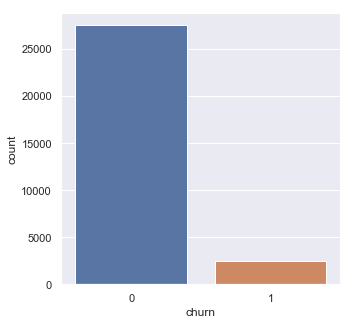

In [190]:
#Lets plot countplot for churn variable
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(5,5))
ax1 = sns.countplot(x="churn", data=telecom_churn_data, ax=ax)

 - <font color=red>There are a total of 2436 churn records and 27455 non-churn records.</font>
 - <font color=red>We have 8.15% of churn rate</font>
 - <font color=red>Classes are imbalanced with very low churn records and very high non-churn records. We will handle this using    class imbalancing technique SMOTE.</font>    

 #### After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).
 
 - The fourth month corresponds to Churn phase
 - We define churn based on this phase
 - Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

In [191]:
#Retrieving all the data corresponding to churn phase
churn_phase_9_cols = [col for col in telecom_churn_data.columns if '_9' in col]
print(churn_phase_9_cols)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'total_calls_mou_9', 'total_vol_mb_9']


In [192]:
#Dropping churn related columns
telecom_churn_data.drop(churn_phase_9_cols,inplace=True,axis=1)
#Also drop sep_vbc_3g column as this column is related to churn phase
telecom_churn_data.drop(['sep_vbc_3g'],inplace=True,axis=1)

In [193]:
#shape
telecom_churn_data.shape

(29891, 140)

<b>Observation</b>: There are total 140 columns in the dataset.

### Check if any variables can be dropped 

In [194]:
#Lets observe local outgoing columns
telecom_churn_data['loc_og_6'] = telecom_churn_data['loc_og_t2c_mou_6'] + \
                                   telecom_churn_data['loc_og_t2t_mou_6'] + \
                                   telecom_churn_data['loc_og_t2m_mou_6'] + \
                                   telecom_churn_data['loc_og_t2f_mou_6']
telecom_churn_data[['loc_og_6','loc_og_mou_6']].head()

loc_og_6  loc_og_mou_6
0       0.00          0.00
7     422.15        422.16
8     378.09        378.09
21     97.04         97.04
23    131.90        131.91

<b>Observation</b>: From the above data, we can observe that loc_og_mou_6 is the total sum of loc_og_t2c_mou_6,loc_og_t2t_mou_6,
loc_og_t2m_mou_6 and loc_og_t2f_mou_6. 

 - So we will be retaining only loc_og_mou_6 and loc_og_t2c_mou as this could be an important variable. So will analyze further.
 - We will be dropping loc_og_t2t_mou_6,loc_og_t2m_mou_6 and loc_og_t2f_mou_6 columns.

Similar observations are made for loc_og_mou_7 and loc_og_mou_8

In [195]:
#Dropping variables except loc_og_t2c_mou as this could be an important variable. So will analyze further.
telecom_churn_data.drop(['loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8',
                        'loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8',
                        'loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8','loc_og_6'],axis=1,inplace=True)

#### Similar Observations are made for std_ic_mou_6,std_og_mou_6

 - loc_ic_mou_6 = loc_ic_t2t_mou_6 + loc_ic_t2m_mou_6 + loc_ic_t2f_mou_6
 - std_ic_mou_6 = std_ic_t2t_mou_6 + std_ic_t2m_mou_6 + std_ic_t2f_mou_6
 - std_og_mou_6 = std_og_t2t_mou_6 + std_og_t2m_mou_6 + std_og_t2f_mou_6
 - total_ic_mou_6 = loc_ic_mou_6 + std_ic_mou_6 + isd_ic_mou_6 + spl_ic_mou_6 + ic_others_6
 - total_og_mou_6 = loc_og_mou_6 + std_og_mou_6 + isd_og_mou_6 + spl_og_mou_6 + og_others_6


In [196]:
#Dropping local incoming variables
telecom_churn_data.drop(['loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8',
                        'loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8',
                        'loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8'],axis=1,inplace=True)
#Dropping std incoming variables
telecom_churn_data.drop(['std_ic_t2t_mou_6','std_ic_t2t_mou_7','std_ic_t2t_mou_8',
                        'std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8',
                        'std_ic_t2f_mou_6','std_ic_t2f_mou_7','std_ic_t2f_mou_8'],axis=1,inplace=True)
#Dropping std outgoing variables
telecom_churn_data.drop(['std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8',
                        'std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2m_mou_8',
                        'std_og_t2f_mou_6','std_og_t2f_mou_7','std_og_t2f_mou_8'],axis=1,inplace=True)
#Dropping other outgoing and incoming variables that contribute to total_ic_mou_6 and total_og_mou_6
telecom_churn_data.drop(['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8',
                         'loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8',
                         'std_og_mou_6','std_og_mou_7','std_og_mou_8',
                         'std_ic_mou_6','std_ic_mou_7','std_ic_mou_8',
                         'isd_og_mou_6','isd_og_mou_7','isd_og_mou_8',
                         'isd_ic_mou_6','isd_ic_mou_7','isd_ic_mou_8',
                         'spl_og_mou_6','spl_og_mou_7','spl_og_mou_8',
                         'spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8',
                         'ic_others_6','ic_others_7','ic_others_8',
                         'og_others_6','og_others_7','og_others_8'],
                        axis=1,inplace=True)

In [197]:
#Lets check the shape of dataset
telecom_churn_data.shape

(29891, 74)

 ## Bivariate Analysis 
 
 ### Correlation Matrix

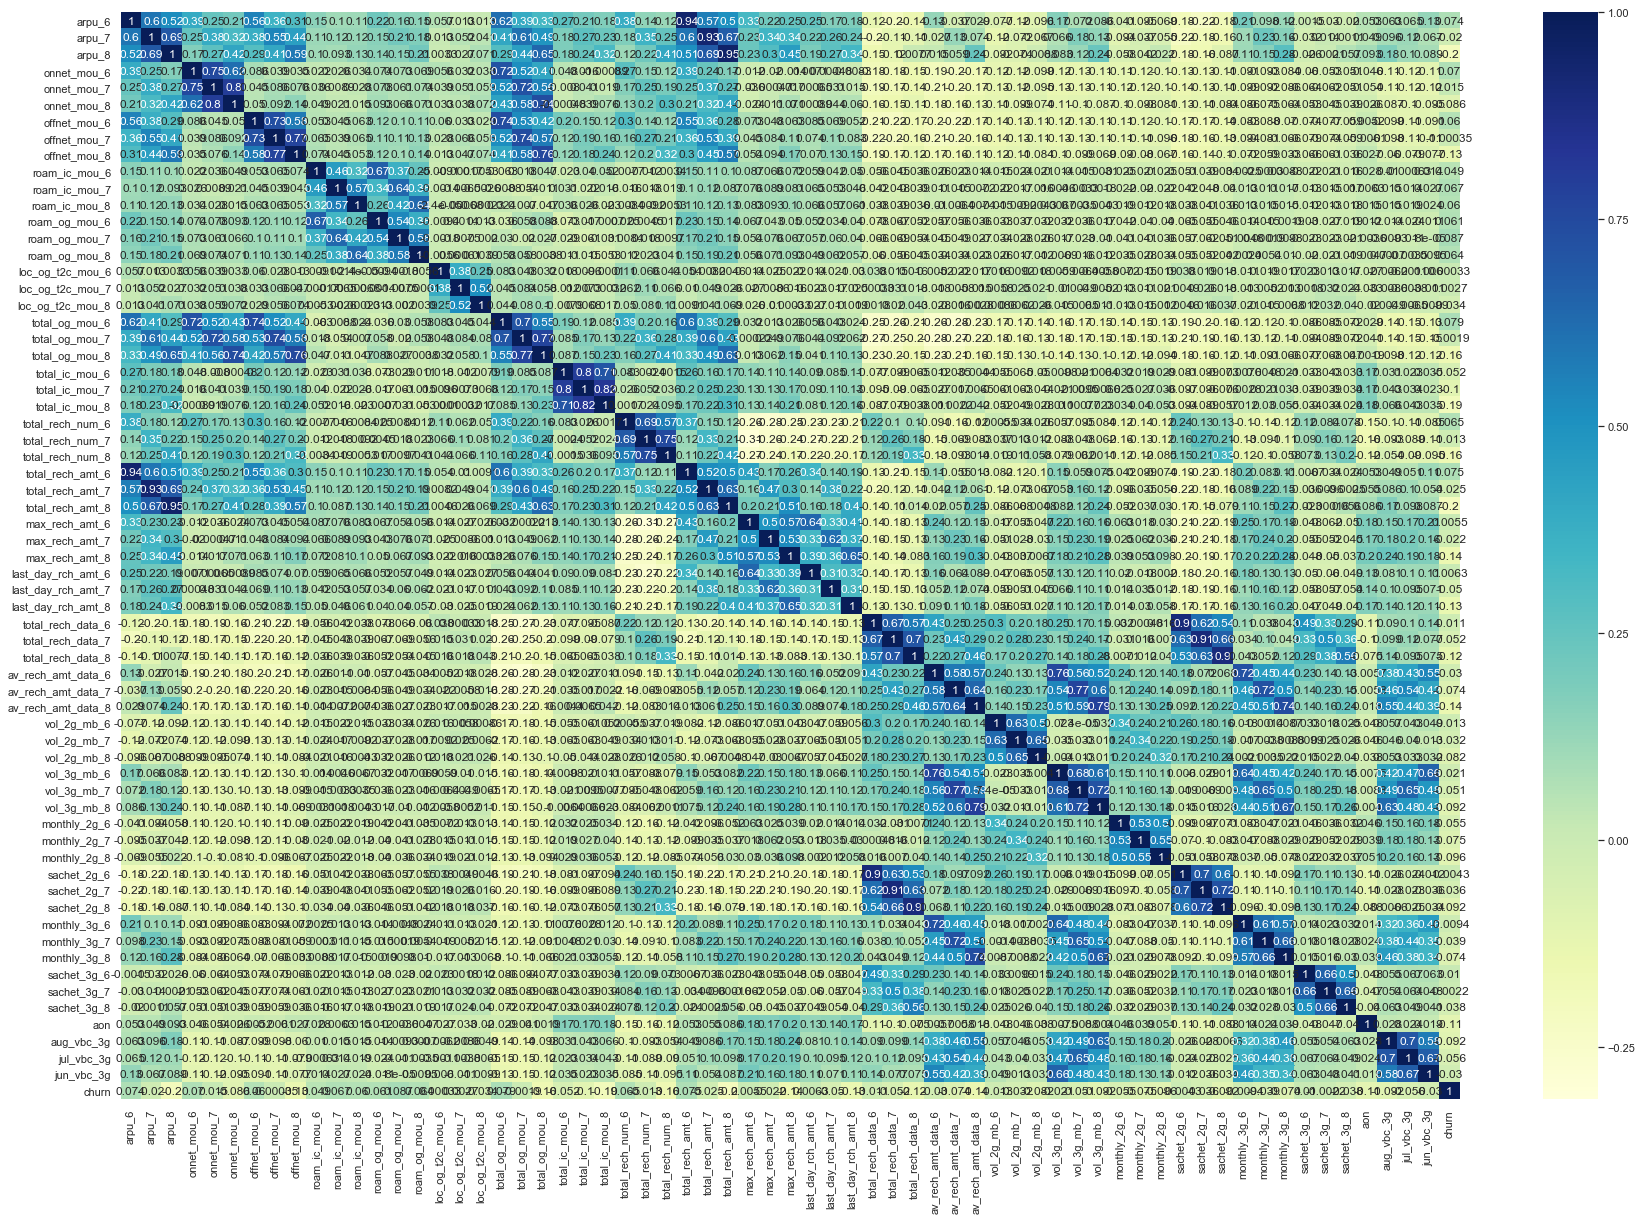

In [198]:
plt.figure(figsize=(30,20))
# heatmap
correlations = telecom_churn_data.corr()
sns.heatmap(telecom_churn_data.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [199]:
#Since correlation matrix is very big, lets print the correlation numbers and observe the highly correlated columns
corr_unstack = correlations.abs().unstack()
corr_unstack.sort_values(ascending = False)

churn               churn                 1.000000
vol_3g_mb_8         vol_3g_mb_8           1.000000
last_day_rch_amt_7  last_day_rch_amt_7    1.000000
last_day_rch_amt_8  last_day_rch_amt_8    1.000000
total_rech_data_6   total_rech_data_6     1.000000
total_rech_data_7   total_rech_data_7     1.000000
total_rech_data_8   total_rech_data_8     1.000000
av_rech_amt_data_6  av_rech_amt_data_6    1.000000
av_rech_amt_data_7  av_rech_amt_data_7    1.000000
av_rech_amt_data_8  av_rech_amt_data_8    1.000000
vol_2g_mb_6         vol_2g_mb_6           1.000000
vol_2g_mb_7         vol_2g_mb_7           1.000000
vol_2g_mb_8         vol_2g_mb_8           1.000000
vol_3g_mb_6         vol_3g_mb_6           1.000000
vol_3g_mb_7         vol_3g_mb_7           1.000000
monthly_2g_6        monthly_2g_6          1.000000
max_rech_amt_7      max_rech_amt_7        1.000000
monthly_2g_7        monthly_2g_7          1.000000
monthly_2g_8        monthly_2g_8          1.000000
sachet_2g_6         sachet_2g_6

<b>Observation</b>:

- total_rech_amt and arpu are highly correlated columns with more than 0.93 correlation.
- total_rech_data and sachet_2g are highly correlated columns with more than 0.90 correlation.
- av_rech_amt_data and vol_3g_mb are correlated with more than 0.76 correlation.

In [200]:
#From the above observations, dropping arpu column and sachet_2g column
telecom_churn_data.drop(['arpu_6','arpu_7','arpu_8',
                        'sachet_2g_6','sachet_2g_7','sachet_2g_8'],axis=1,inplace=True)

### Comparing characteristics of those who churned and those who didn't

Text(0,0.5,'value')

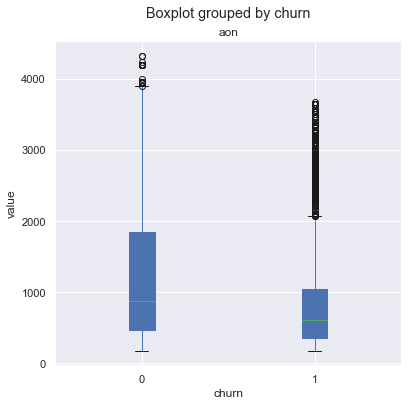

In [201]:
#Lets find out age on network relation with churn variable
ax = telecom_churn_data.boxplot(column='aon',by='churn', patch_artist=True, figsize=(6,6))
ax.set_ylabel('value')

<b>Observation</b> : Customers who have higher age on network have less chances to churn.

In [202]:
#Function to plot continuous vs categorical variable(churn)
def bivar_cont_cat_barplots(var1,var2,var3):
    fig, ax = plt.subplots(1,3,figsize=(18,8))
    sns.catplot(x="churn",  y=var1, data=telecom_churn_data, kind='bar', ax=ax[0])
    sns.catplot(x="churn",  y=var2, data=telecom_churn_data, kind='bar', ax=ax[1])
    sns.catplot(x="churn",  y=var3, data=telecom_churn_data, kind='bar', ax=ax[2])
    plt.close(2)
    plt.close(3)
    plt.close(4)
    return

#Function to plot categorical vs categorical variable(churn)
def bivar_cat_cat_barplots(var1,var2,var3):
    fig, ax = plt.subplots(1,3,figsize=(18,8))
    sns.countplot(x=var1,hue="churn", data=telecom_churn_data, ax=ax[0])
    sns.countplot(x=var2,hue="churn", data=telecom_churn_data, ax=ax[1])
    sns.countplot(x=var3,hue="churn", data=telecom_churn_data, ax=ax[2])
    plt.close(2)
    plt.close(3)
    plt.close(4)
    return

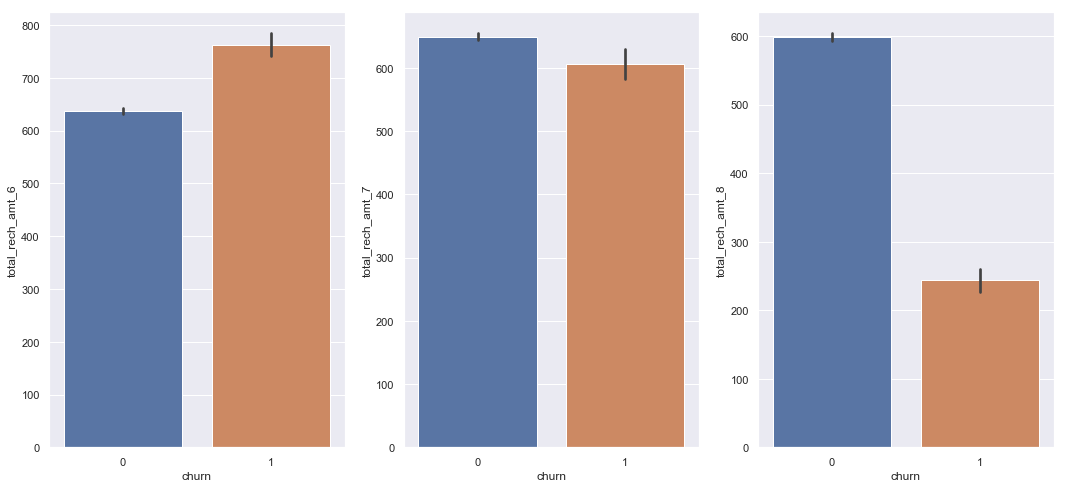

In [203]:
#Plot total_rech_amt vs churn
bivar_cont_cat_barplots("total_rech_amt_6","total_rech_amt_7","total_rech_amt_8")

<b>Observation</b>:
 - Total Recharge amount for churn customers has decreased over the months. Lets create a derived variable and analyze further.
 - Similar observations are made for on the network and off the network minutes of usage. We will create derived variables and analyze further.
 - Similar observations are made for total incoming and total outgoing minutes of usage. We will create derived variables and analyze further.
 - Similar observations are made for total recharge number. We will create derived variables and analyze further.
 - Similar observations are made for maximum recharge amount. We will create derived variables and analyze further.
 - Similar observations are made for last day recharge amount, total recharge data,average recharge amount data, vol 2g mb, vol 3g mb, monthly 2g, monthly 3g and volume based cost. We will create derived variables and analyze further.

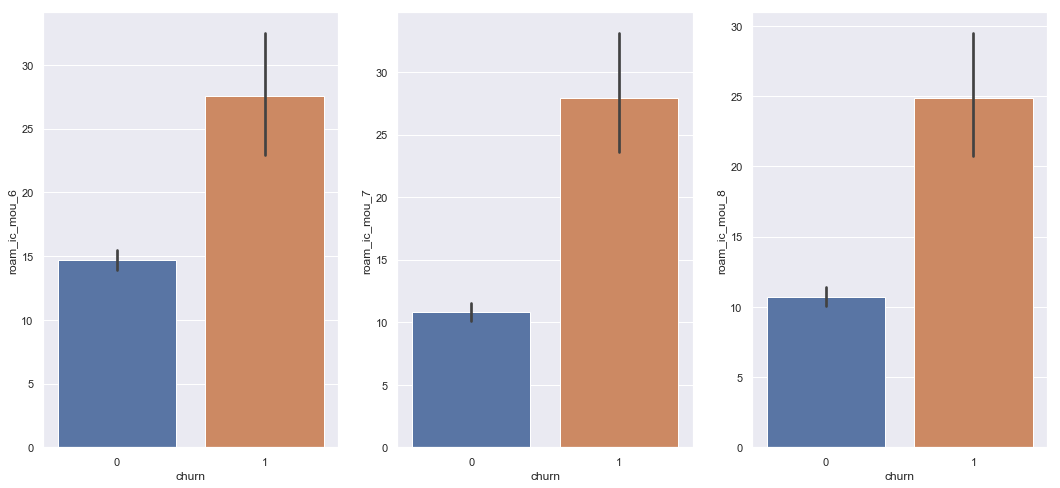

In [204]:
#Plot roam_ic_mou vs churn
bivar_cont_cat_barplots("roam_ic_mou_6","roam_ic_mou_7","roam_ic_mou_8")

<b>Observation</b>:
 - Roaming incoming minutes of usage doesn't show any specific pattern over the months June, July and Aug for churn and non-churn customers. So lets keep this variable for further analysis
 - Similar observation is made for roaming outgoing minutes of usage.
 - Similar observation is made for local outgoing t2c minutes of usage.
 - Similar observation is made for sachet 3g column.

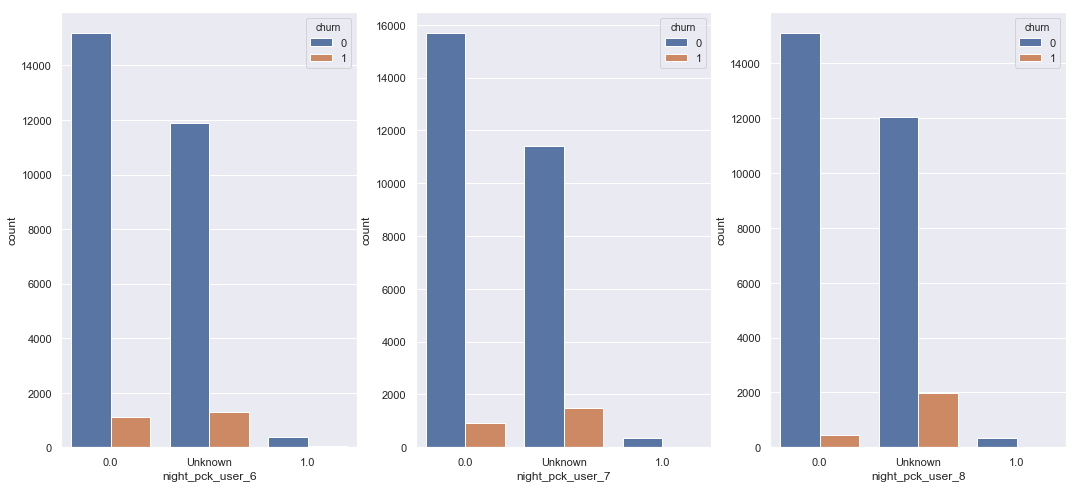

In [205]:
#Plot night_pck_user vs churn
bivar_cat_cat_barplots("night_pck_user_6","night_pck_user_7","night_pck_user_8")

<b>Observation</b> : 
 - From the above graph, it is clearly evident that lot of Unknown data is present. And the churn customers have increased over the months June, July and August for Category 'Unknown'. Since it is not clear about this Unknown category, we will not be able to predict correctly how night_pck_user is contributing to the variable churn. So we will be dropping this variable.
 - Similar Observation is made for fb_user. So we will be dropping this variable as well.

In [206]:
#Dropping fb_user and night_pck_user variables
telecom_churn_data.drop(['fb_user_6','fb_user_7','fb_user_8',
                        'night_pck_user_6','night_pck_user_7','night_pck_user_8'],axis=1,inplace=True)

 ## Feature Engineering - Creating Derived variables

In [207]:
# Derived variable - is_onnet_mou_reduced
# If it is 1 , on network mou is decreased and 0 if increased
# Get the onnet mou difference between consecutive months and derive the variable to check if onnet mou has reduced
telecom_churn_data['onnet_mou_diff_6_7']=telecom_churn_data['onnet_mou_6']-telecom_churn_data['onnet_mou_7']
telecom_churn_data['onnet_mou_diff_7_8']=telecom_churn_data['onnet_mou_7']-telecom_churn_data['onnet_mou_8']
#Determine if onnet mou is reduced or not 
telecom_churn_data['is_onnet_mou_reduced']=np.where((telecom_churn_data['onnet_mou_diff_7_8'] > telecom_churn_data['onnet_mou_diff_6_7']), 1, 0)


# Derived variable - is_offnet_mou_reduced - 
# If it is 1 , off network mou is decreased and 0 if increased
# Get the offnet mou difference between consecutive months and derive the variable to check if offnet mou has reduced
telecom_churn_data['offnet_mou_diff_6_7']=telecom_churn_data['offnet_mou_6']-telecom_churn_data['offnet_mou_7']
telecom_churn_data['offnet_mou_diff_7_8']=telecom_churn_data['offnet_mou_7']-telecom_churn_data['offnet_mou_8']
#Determine if offnet mou is reduced or not 
telecom_churn_data['is_offnet_mou_reduced']=np.where((telecom_churn_data['offnet_mou_diff_7_8'] > telecom_churn_data['offnet_mou_diff_6_7']), 1, 0)


# Derived variable - is_tot_og_mou_reduced - 
# If it is 1 , total outgoing mou is decreased and 0 if increased
# Get the total outgoing mou difference between consecutive months and 
# derive the variable to check if total outgoing mou has reduced
telecom_churn_data['tot_og_mou_diff_6_7']=telecom_churn_data['total_og_mou_6']-telecom_churn_data['total_og_mou_7']
telecom_churn_data['tot_og_mou_diff_7_8']=telecom_churn_data['total_og_mou_7']-telecom_churn_data['total_og_mou_8']
#Determine if total outgoing mou is reduced or not 
telecom_churn_data['is_tot_og_mou_reduced']=np.where((telecom_churn_data['tot_og_mou_diff_7_8'] > telecom_churn_data['tot_og_mou_diff_6_7']), 1, 0)


# Derived variable - is_total_ic_mou_reduced - 
# If it is 1 , total incoming mou is decreased and 0 if increased
# Get the total incoming mou difference between consecutive months and 
# derive the variable to check if total incoming mou has reduced
telecom_churn_data['total_ic_mou_diff_6_7']=telecom_churn_data['total_ic_mou_6']-telecom_churn_data['total_ic_mou_7']
telecom_churn_data['total_ic_mou_diff_7_8']=telecom_churn_data['total_ic_mou_7']-telecom_churn_data['total_ic_mou_8']
#Determine if total incoming mou is reduced or not 
telecom_churn_data['is_total_ic_mou_reduced']=np.where((telecom_churn_data['total_ic_mou_diff_7_8'] > telecom_churn_data['total_ic_mou_diff_6_7']), 1, 0)


# Derived variable - is_tot_rech_amt_reduced
# If it is 1 , total recharge amount is decreased and 0 if increased
telecom_churn_data['tot_rech_amt_6_7']=telecom_churn_data['total_rech_amt_6']-telecom_churn_data['total_rech_amt_7']
telecom_churn_data['tot_rech_amt_7_8']=telecom_churn_data['total_rech_amt_7']-telecom_churn_data['total_rech_amt_8']
telecom_churn_data['is_tot_rech_amt_reduced']=np.where((telecom_churn_data['tot_rech_amt_7_8'] > telecom_churn_data['tot_rech_amt_6_7']), 1, 0)


# Derived variable - is_last_day_rch_amt_reduced
# If it is 1 , last day recharge amount is decreased and 0 if increased
telecom_churn_data['last_day_rch_amt_6_7']=telecom_churn_data['last_day_rch_amt_6']-telecom_churn_data['last_day_rch_amt_7']
telecom_churn_data['last_day_rch_amt_7_8']=telecom_churn_data['last_day_rch_amt_7']-telecom_churn_data['last_day_rch_amt_8']
telecom_churn_data['is_last_day_rch_amt_reduced']=np.where((telecom_churn_data['last_day_rch_amt_7_8'] > telecom_churn_data['last_day_rch_amt_6_7']), 1, 0)


# Derived variable - is_total_rech_data_reduced
# If it is 1 , total recharge data is decreased and 0 if increased
telecom_churn_data['total_rech_data_6_7']=telecom_churn_data['total_rech_data_6']-telecom_churn_data['total_rech_data_7']
telecom_churn_data['total_rech_data_7_8']=telecom_churn_data['total_rech_data_7']-telecom_churn_data['total_rech_data_8']
telecom_churn_data['is_total_rech_data_reduced']=np.where((telecom_churn_data['total_rech_data_7_8'] > telecom_churn_data['total_rech_data_6_7']), 1, 0)


# Derived variable - is_max_rech_amt_reduced
# If it is 1 , max recharge amount is decreased and 0 if increased
telecom_churn_data['max_rech_amt_6_7']=telecom_churn_data['max_rech_amt_6']-telecom_churn_data['max_rech_amt_7']
telecom_churn_data['max_rech_amt_7_8']=telecom_churn_data['max_rech_amt_7']-telecom_churn_data['max_rech_amt_8']
telecom_churn_data['is_max_rech_amt_reduced']=np.where((telecom_churn_data['max_rech_amt_7_8'] > telecom_churn_data['max_rech_amt_6_7']), 1, 0)


# Derived variable - is_av_rech_amt_data_reduced
# If it is 1 , avg recharge amount data is decreased and 0 if increased
telecom_churn_data['av_rech_amt_data_6_7']=telecom_churn_data['av_rech_amt_data_6']-telecom_churn_data['av_rech_amt_data_7']
telecom_churn_data['av_rech_amt_data_7_8']=telecom_churn_data['av_rech_amt_data_7']-telecom_churn_data['av_rech_amt_data_8']
telecom_churn_data['is_av_rech_amt_data_reduced']=np.where((telecom_churn_data['av_rech_amt_data_7_8'] > telecom_churn_data['av_rech_amt_data_6_7']), 1, 0)


# Derived variable -  is_vol_2g_mb_reduced
# If it is 1 , 2g volume mb is decreased and 0 if increased
telecom_churn_data['vol_2g_mb_6_7']=telecom_churn_data['vol_2g_mb_6']-telecom_churn_data['vol_2g_mb_7']
telecom_churn_data['vol_2g_mb_7_8']=telecom_churn_data['vol_2g_mb_7']-telecom_churn_data['vol_2g_mb_8']
telecom_churn_data['is_vol_2g_mb_reduced']=np.where((telecom_churn_data['vol_2g_mb_7_8'] > telecom_churn_data['vol_2g_mb_6_7']), 1, 0)

# Derived variable -  is_vol_3g_mb_reduced
# If it is 1 , 3g volume mb is decreased and 0 if increased
telecom_churn_data['vol_3g_mb_6_7']=telecom_churn_data['vol_3g_mb_6']-telecom_churn_data['vol_3g_mb_7']
telecom_churn_data['vol_3g_mb_7_8']=telecom_churn_data['vol_3g_mb_7']-telecom_churn_data['vol_3g_mb_8']
telecom_churn_data['is_vol_3g_mb_reduced']=np.where((telecom_churn_data['vol_3g_mb_7_8'] > telecom_churn_data['vol_3g_mb_6_7']), 1, 0)

# Derived variable -  is_monthly_2g_reduced
# If it is 1 , 2g monthly is decreased and 0 if increased
telecom_churn_data['monthly_2g_6_7']=telecom_churn_data['monthly_2g_6']-telecom_churn_data['monthly_2g_7']
telecom_churn_data['monthly_2g_7_8']=telecom_churn_data['monthly_2g_7']-telecom_churn_data['monthly_2g_8']
telecom_churn_data['is_monthly_2g_reduced']=np.where((telecom_churn_data['monthly_2g_7_8'] > telecom_churn_data['monthly_2g_6_7']), 1, 0)

# Derived variable -  is_monthly_3g_reduced
# If it is 1 , 3g monthly is decreased and 0 if increased
telecom_churn_data['monthly_3g_6_7']=telecom_churn_data['monthly_3g_6']-telecom_churn_data['monthly_3g_7']
telecom_churn_data['monthly_3g_7_8']=telecom_churn_data['monthly_3g_7']-telecom_churn_data['monthly_3g_8']
telecom_churn_data['is_monthly_3g_reduced']=np.where((telecom_churn_data['monthly_3g_7_8'] > telecom_churn_data['monthly_3g_6_7']), 1, 0)

# Derived variable -  is_tot_rech_num_reduced
# If it is 1 , total recharge number is decreased and 0 if increased
telecom_churn_data['total_rech_num_6_7']=telecom_churn_data['total_rech_num_6']-telecom_churn_data['total_rech_num_7']
telecom_churn_data['total_rech_num_7_8']=telecom_churn_data['total_rech_num_7']-telecom_churn_data['total_rech_num_8']
telecom_churn_data['is_tot_rech_num_reduced']=np.where((telecom_churn_data['total_rech_num_7_8'] > telecom_churn_data['total_rech_num_6_7']), 1, 0)

# Derived variable -  is_vbc_reduced
# If it is 1 , vbc is decreased and 0 if increased
telecom_churn_data['vbc_6_7']=telecom_churn_data['jun_vbc_3g']-telecom_churn_data['jul_vbc_3g']
telecom_churn_data['vbc_7_8']=telecom_churn_data['jul_vbc_3g']-telecom_churn_data['aug_vbc_3g']
telecom_churn_data['is_vbc_reduced']=np.where((telecom_churn_data['vbc_7_8'] > telecom_churn_data['vbc_6_7']), 1, 0)


#Formatting the date to find out elapsed days
from datetime import datetime
telecom_churn_data['last_rech_date_6'] = telecom_churn_data['date_of_last_rech_6'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y'))
telecom_churn_data['last_rech_date_7'] = telecom_churn_data['date_of_last_rech_7'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y'))
telecom_churn_data['last_rech_date_8'] = telecom_churn_data['date_of_last_rech_8'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y'))

#Get the elapsed days between consecutive months
telecom_churn_data['elapsed_days_7_6'] = (telecom_churn_data['last_rech_date_7']-telecom_churn_data['last_rech_date_6']).astype('timedelta64[D]')
telecom_churn_data['elapsed_days_8_7'] = (telecom_churn_data['last_rech_date_8']-telecom_churn_data['last_rech_date_7']).astype('timedelta64[D]')

#Determine is_last_rech_date_elapse_increased over the months Jun, Jul and Aug
telecom_churn_data['is_last_rch_elapse_days_increased']=np.where((telecom_churn_data['elapsed_days_8_7'] > telecom_churn_data['elapsed_days_7_6']), 1, 0)

In [208]:
telecom_churn_data.columns

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_6',
       'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_num_6',
       'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6',
       'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'date_of_last_rech_6',
       'date_of_last_rech_7', 'date_of_last_rech_8', 'last_day_rch_amt_6',
       'last_day_rch_amt_7', 'last_day_rch_amt_8', 'total_rech_data_6',
       'total_rech_data_7', 'total_rech_data_8', 'av_rech_amt_data_6',
       'av_rech_amt_data_7', 'av_rech_amt_data_8', 'vol_2g_mb_6',
       'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7',
       'vol_3g_mb_8', 'mon

In [209]:
#Dropping all Intermediate columns
telecom_churn_data.drop(['date_of_last_rech_6',
       'date_of_last_rech_7', 'date_of_last_rech_8',
       'onnet_mou_diff_6_7', 'onnet_mou_diff_7_8', 
       'offnet_mou_diff_6_7', 'offnet_mou_diff_7_8',
       'tot_og_mou_diff_6_7', 'tot_og_mou_diff_7_8', 
       'total_ic_mou_diff_6_7', 'total_ic_mou_diff_7_8',
       'tot_rech_amt_6_7', 'tot_rech_amt_7_8',
       'last_day_rch_amt_6_7', 'last_day_rch_amt_7_8', 
       'total_rech_data_6_7', 'total_rech_data_7_8',
       'max_rech_amt_6_7', 'max_rech_amt_7_8',
       'av_rech_amt_data_6_7', 'av_rech_amt_data_7_8', 
       'vol_2g_mb_6_7', 'vol_2g_mb_7_8', 
       'vol_3g_mb_6_7', 'vol_3g_mb_7_8', 
       'monthly_2g_6_7', 'monthly_2g_7_8', 
       'monthly_3g_6_7', 'monthly_3g_7_8', 
       'total_rech_num_6_7', 'total_rech_num_7_8', 'vbc_6_7', 'vbc_7_8',
       'last_rech_date_6', 'last_rech_date_7','last_rech_date_8', 'elapsed_days_7_6', 'elapsed_days_8_7'],axis=1,inplace=True)

In [210]:
telecom_churn_data.columns

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_6',
       'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_num_6',
       'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6',
       'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_6',
       'last_day_rch_amt_7', 'last_day_rch_amt_8', 'total_rech_data_6',
       'total_rech_data_7', 'total_rech_data_8', 'av_rech_amt_data_6',
       'av_rech_amt_data_7', 'av_rech_amt_data_8', 'vol_2g_mb_6',
       'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7',
       'vol_3g_mb_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
       'monthly_3g_6', 'monthly_

In [211]:
telecom_churn_data.shape

(29891, 75)

### Splitting Data into Training and Test Sets

In [212]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = telecom_churn_data.drop(['churn'],axis=1)

# Putting response variable to y
y = telecom_churn_data['churn']

y.head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int32

In [213]:
# Splitting the data into train and test
#random_state is the seed used by the random number generator, it can be any integer.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

In [214]:
X_train.shape

(20923, 74)

In [215]:
X_test.shape

(8968, 74)

 ## Feature Normalization

In [216]:
from sklearn import preprocessing
X_scaler = preprocessing.Normalizer().fit(X_train)
Xtrain=X_scaler.transform(X_train)

In [217]:
#Transforming test dataset
Xtest=X_scaler.transform(X_test)

In [218]:
#Converting transformed Xtrain and Xtest to dataframes
Xtrain = pd.DataFrame(Xtrain, columns = X_train.columns)
Xtest=pd.DataFrame(Xtest,columns = X_train.columns)

## EDA Analysis Conclusion:
 
 - Derived new columns based on Usage over months June, July and August
 - No missing values and duplicate values in dataset
 - Dropped mobile_number column as it will not be useful in our further analysis
 - Imputed missing values in numerical columns with 0 and categorical columns as Unknown
 - Rescaled the variables by applying normalize function
 - Univariate and Bivariate Analysis by plotting graphs

# Goal 1 - To Predict customers who will churn 

## PCA - Dimensionality Reduction Technique

#### Note - 
- While computng the principal components, we must not include the entire dataset. Model building is all about doing well on the data we haven't seen yet!
- So we'll calculate the PCs using the train data, and apply them later on the test data

In [219]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [220]:
#Doing the PCA on the train data
pca.fit(Xtrain)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

### Looking at the screeplot to assess the number of needed principal components

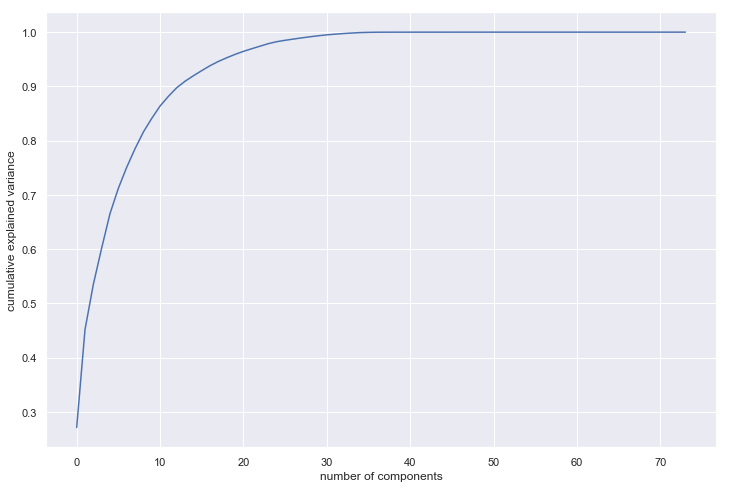

In [221]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [222]:
#Considering 90% of explained variance
pca_final = PCA(0.90)

In [223]:
df_train_pca = pca_final.fit_transform(Xtrain)
df_train_pca.shape

(20923, 14)

<b>Observation</b>: We have got 14 PCA components after considering 90% of explained variance.

In [224]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

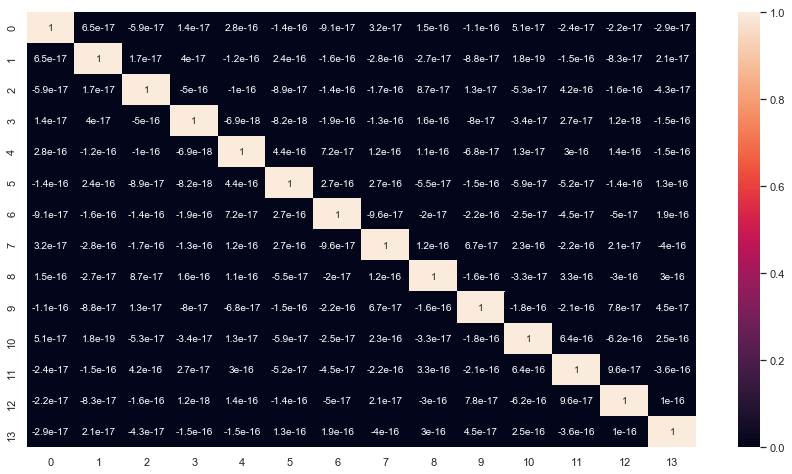

In [225]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (15,8))
sns.heatmap(corrmat,annot = True)

<b>Observation</b>: From the graph, it is clear that none of the components are correlated with each other.

In [226]:
#Applying selected components to the test data - 14 components
df_test_pca = pca_final.transform(Xtest)
df_test_pca.shape

(8968, 14)

 ## Class Imbalancing Technique - SMOTE

In [227]:
#Since the classes are imbalanced - we are applying class imbalancing technique SMOTE to make sure the results are not biased.
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(df_train_pca, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 1704
Before OverSampling, counts of label '0': 19219 

After OverSampling, the shape of train_X: (38438, 14)
After OverSampling, the shape of train_y: (38438,) 

After OverSampling, counts of label '1': 19219
After OverSampling, counts of label '0': 19219


 ## Applying Logistic Regression after PCA

In [228]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

#Tuning Hyperparameter C values for LR
parameters = {'C':[0.001,0.01,0.1,1,10,100,1000]}
folds = KFold(n_splits=5, shuffle=True, random_state = 5)
lr = LogisticRegression()

#Applying GridsearchCV on Logistic regression using KFold
#Using scoring=recall as we dont want to predict churn customers as non-churn
clf = GridSearchCV(lr, param_grid=parameters, cv=folds, verbose=5, n_jobs=3, scoring='recall')
clf.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    2.6s
[Parallel(n_jobs=3)]: Done  35 out of  35 | elapsed:    4.0s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=5, shuffle=True),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=3,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=5)

In [229]:
clf.best_params_

{'C': 100}

In [230]:
lr1 = LogisticRegression(C=100, verbose=5)
model_lr=lr1.fit(X_train_res, y_train_res)

[LibLinear]

##  Model Evaluation Metrics - Logistic Regression

In [231]:
#ROC curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [232]:
#Importing metrics
from sklearn import metrics

#Model Evaluation Metrics function
def model_eval_metrics(true,pred):
    # Confusion matrix 
    confusion = metrics.confusion_matrix( true, pred)
    print()
    print('Confusion Matrix')
    print(confusion)
    print()

    #Accuracy
    print('Accuracy : ',metrics.accuracy_score( true, pred ))
    print()
 
    #Sensitivity and Specificity
    from imblearn.metrics import sensitivity_specificity_support
    sensitivity,specificity,_ = sensitivity_specificity_support(true,pred,average='binary')
    
    print('Sensitivity : ',sensitivity)
    
    print('Specificity : ',specificity)

    #Plotting roc curve
    draw_roc(true,pred)
    return

 ### Logistic Regression Model evaluation metrics on training data


Confusion Matrix
[[16125  3094]
 [ 3801 15418]]

Accuracy :  0.8206202195743795

Sensitivity :  0.8022269629012956
Specificity :  0.8390134762474635


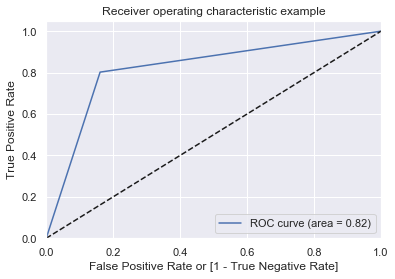

In [233]:
#Predicting the model on training data
y_train_pred=model_lr.predict(X_train_res)
model_eval_metrics(y_train_res, y_train_pred)

 ### Logistic Regression Model evaluation metrics on test data



Confusion Matrix
[[6899 1337]
 [ 154  578]]

Accuracy :  0.8337421944692239

Sensitivity :  0.7896174863387978
Specificity :  0.8376639145216125


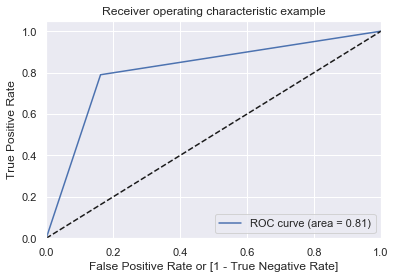

In [234]:
#Predicting the model on test data
y_test_pred=model_lr.predict(df_test_pca)
model_eval_metrics(y_test, y_test_pred)

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity.

<font color='red'>This threshold should be defined depending on the business problem we are working. In the current problem, we should not predict the churn customers as non-churn. So sensitivity should be higher than Specificity.</font>

In [235]:
# Predicted probabilities
y_pred_train_prob = model_lr.predict_proba(X_train_res)
# Converting y_pred_train_prob to a dataframe which is an array
y_pred_train_df = pd.DataFrame(y_pred_train_prob)
# Converting to column dataframe
y_pred_train = y_pred_train_df.iloc[:,[1]]

# Converting y_train to dataframe
y_train_df = pd.DataFrame(y_train_res)
# Putting ID to index
y_train_df['ID'] = y_train_df.index

# Removing index for both dataframes to append them side by side 
y_pred_train.reset_index(drop=True, inplace=True)
y_train_df.reset_index(drop=True, inplace=True)


# Appending y_train_df and y_pred_train
y_pred_train_final = pd.concat([y_train_df,y_pred_train],axis=1)
# Renaming the column 
y_pred_train_final= y_pred_train_final.rename(columns={ 1 : 'Churn_Prob'})
y_pred_train_final= y_pred_train_final.rename(columns={ 0 : 'Churn'})


# Rearranging the columns
y_pred_train_final = y_pred_train_final.reindex_axis(['ID','Churn','Churn_Prob'], axis=1)

# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_train_final['predicted'] = y_pred_train_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
y_pred_train_final.head()


ID  Churn  Churn_Prob  predicted
0   0      0    0.261796          0
1   1      0    0.134473          0
2   2      1    0.953211          1
3   3      0    0.380769          0
4   4      0    0.261696          0

In [236]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_train_final[i]= y_pred_train_final.Churn_Prob.map( lambda x: 1 if x > i else 0)
y_pred_train_final.head()

ID  Churn  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0   0      0    0.261796          0    1    1    1    0    0    0    0    0   
1   1      0    0.134473          0    1    1    0    0    0    0    0    0   
2   2      1    0.953211          1    1    1    1    1    1    1    1    1   
3   3      0    0.380769          0    1    1    1    1    0    0    0    0   
4   4      0    0.261696          0    1    1    1    0    0    0    0    0   

   0.8  0.9  
0    0    0  
1    0    0  
2    1    1  
3    0    0  
4    0    0

In [237]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_train_final.Churn, y_pred_train_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.625371  0.977522  0.273219
0.2   0.2  0.726495  0.939903  0.513086
0.3   0.3  0.785499  0.897081  0.673916
0.4   0.4  0.812893  0.851397  0.774390
0.5   0.5  0.820620  0.802227  0.839013
0.6   0.6  0.816067  0.748010  0.884125
0.7   0.7  0.789661  0.664551  0.914772
0.8   0.8  0.745616  0.548624  0.942609
0.9   0.9  0.667022  0.360581  0.973464


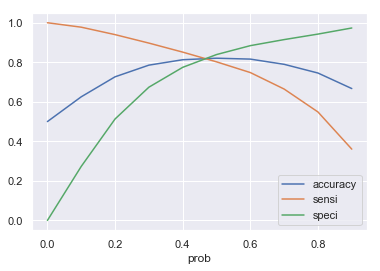

In [238]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

<b>Observation</b>: For cut-off probability 0.4, Sensitivity is higher than Specificity and Accuracy also looks good.
So we will consider threshhold cutoff as 0.4

### From the curve above, 0.4 is the optimum point to take it as a cutoff probability.

In [239]:
#Predicting probabilities with threshhold cutoff as 0.4 on training data
y_pred_train_final['final_predicted'] = y_pred_train_final.Churn_Prob.map( lambda x: 1 if x > 0.4 else 0)

 ### Model Evaluation metrics on training data for logistic regression probability threshold of 0.4


Confusion Matrix
[[14883  4336]
 [ 2856 16363]]

Accuracy :  0.8128934908163796

Sensitivity :  0.8513970549976586
Specificity :  0.7743899266351006


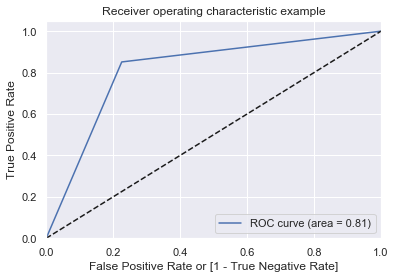

In [240]:
model_eval_metrics(y_pred_train_final.Churn, y_pred_train_final.final_predicted)

 ### Calculating Probabilities for test dataset

In [241]:
# Predicted probabilities
y_pred_test_prob = model_lr.predict_proba(df_test_pca)
# Converting y_pred_test_prob to a dataframe which is an array
y_pred_test_df = pd.DataFrame(y_pred_test_prob)
# Converting to column dataframe
y_pred_test = y_pred_test_df.iloc[:,[1]]

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Putting ID to index
y_test_df['ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_pred_test.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)


# Appending y_train_df and y_pred_train
y_pred_test_final = pd.concat([y_test_df,y_pred_test],axis=1)
# Renaming the column 
y_pred_test_final= y_pred_test_final.rename(columns={ 1 : 'Churn_Prob'})


In [242]:
#Predicting probabilities with threshhold cutoff as 0.4 on test data
y_pred_test_final['final_predicted'] = y_pred_test_final.Churn_Prob.map( lambda x: 1 if x > 0.4 else 0)

 ### Model Evaluation metrics on test data for logistic regression probability threshold of 0.4


Confusion Matrix
[[6376 1860]
 [ 120  612]]

Accuracy :  0.77921498661909

Sensitivity :  0.8360655737704918
Specificity :  0.7741622146673143


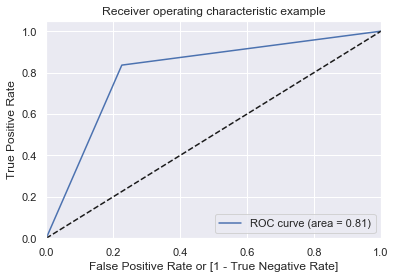

In [243]:
model_eval_metrics(y_pred_test_final.churn, y_pred_test_final.final_predicted)

# SVM

In [244]:
from sklearn import svm
from sklearn import metrics

# a simple SVM model with linear kernel   
svm_linear = svm.SVC(kernel='linear')

# fit
svm_linear.fit(X_train_res, y_train_res)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


Confusion Matrix
[[16322  2897]
 [ 3970 15249]]

Accuracy :  0.8213486653832145

Sensitivity :  0.7934335813517873
Specificity :  0.8492637494146418


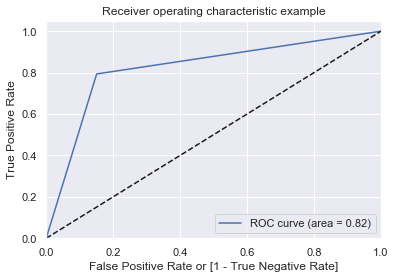

In [245]:
#Predicting the linear svm model on training data
y_train_pred=svm_linear.predict(X_train_res)
model_eval_metrics(y_train_res, y_train_pred)


Confusion Matrix
[[7006 1230]
 [ 163  569]]

Accuracy :  0.8446699375557538

Sensitivity :  0.7773224043715847
Specificity :  0.8506556580864497


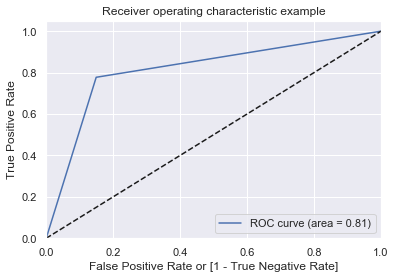

In [246]:
#Predicting the linear svm model on test data
y_test_pred=svm_linear.predict(df_test_pca)
model_eval_metrics(y_test, y_test_pred)

In [247]:
# run gc.collect() (garbage collect) to free up memory
# else, since the dataset is large and SVM is computationally heavy,
# it'll throw a memory error while training
import gc

gc.collect()

13452

<b><font color='red' size='6'>Important Note:</font></b>

- We have performed the below GridSearchCV for SVM model and got the best hyperparameters C = 100 and gamma = 0.01
- We have commented the below code since it is taking longer time to run.

In [248]:
# conduct (grid search) cross-validation to find the optimal values 
# of cost C and the choice of kernel

#from sklearn.model_selection import GridSearchCV

#parameters = {'C':[1, 10, 100], 
#             'gamma': [1e-2, 1e-3, 1e-4]}

# instantiate a model 
#svc_grid_search = svm.SVC(kernel="rbf")

# create a classifier to perform grid search
#clf = GridSearchCV(svc_grid_search, param_grid=parameters, scoring='recall')

# fit
#clf.fit(X_train_res, y_train_res)

#print(clf.best_score_)
#print(clf.best_params_)

In [249]:
# Using optimal hyperparameters which we got from GridSearchCV.
best_C = 100
best_gamma = 0.01

# rbf model
svm_final = svm.SVC(kernel='rbf', C=best_C, gamma=best_gamma)

# fit
svm_final.fit(X_train_res, y_train_res)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


Confusion Matrix
[[16497  2722]
 [ 3973 15246]]

Accuracy :  0.825823403923201

Sensitivity :  0.7932774858213226
Specificity :  0.8583693220250793


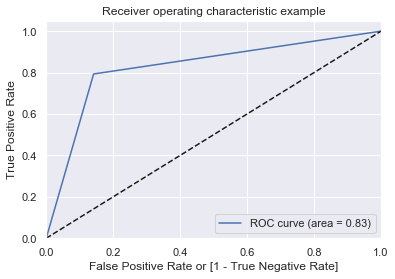

In [250]:
#Predicting the rbf svm model on training data
y_train_pred=svm_final.predict(X_train_res)
model_eval_metrics(y_train_res, y_train_pred)


Confusion Matrix
[[7078 1158]
 [ 161  571]]

Accuracy :  0.852921498661909

Sensitivity :  0.7800546448087432
Specificity :  0.8593977659057795


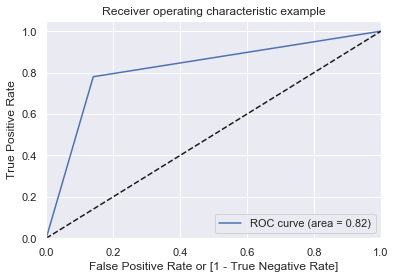

In [251]:
#Predicting the rbf svm model on testing data
y_test_pred=svm_final.predict(df_test_pca)
model_eval_metrics(y_test, y_test_pred)

 # Goal 1 - Conclusion
 
                                 Logistic Regression		                       SVM	
	                       Threshold>0.5	Threshold>0.4	           Kernel=Linear	Kernel=RBF
				
               Sensitivity	     0.79	         0.84	                   0.78	          0.78
               Specificity	     0.84	         0.77	                   0.85	          0.86
             ROC_AUC_Score	     0.81	         0.81	                   0.81	          0.82
                  Accuracy	     0.83	         0.78	                   0.84	          0.85
                  
                  
 ### Since the business is more concerned about not losing the customers, We have to predict the churn customers correctly. A non-churn customer can be predicted as churn but a churn customer should not be predicted as non-churn. Considering this scenario and from the above metrics, we have to choose a model with high sensitivity, good specificity and good ROC_AUC_Score.
 
 ## <font color='green'>We chose Logistic Regression Model with CutOff Threshold as 0.4 as an appropriate model to predict customers who will churn. This model is having high sensitivity, good specificity and good ROC_AUC_score when compared to other models.</font>

# Goal 2 - Modelling for predictor variables

## Logistic Regression

In [252]:
#Scaled X variable shape
print(Xtrain.shape)

(20923, 74)


 #### Since the classes are imbalanced, using SMOTE technique for class imbalancing

In [253]:
#Since the classes are imbalanced - we are applying class imbalancing technique SMOTE to make sure the results are not biased.
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(Xtrain, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 1704
Before OverSampling, counts of label '0': 19219 

After OverSampling, the shape of train_X: (38438, 74)
After OverSampling, the shape of train_y: (38438,) 

After OverSampling, counts of label '1': 19219
After OverSampling, counts of label '0': 19219


In [254]:
#Converting into dataframe and adding header
X_train_res=pd.DataFrame(X_train_res,columns = Xtrain.columns)

In [255]:
# UDF for calculating vif value
def vif_cal(input_data):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=input_data[xvar_names[i]] 
        x=input_data[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [256]:
# Importing RFE and LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
#RFE Function
lm = LogisticRegression()
def RFE_Model_StatsandVIF(varCount,X_train, y_train, print_VIF_flag):
    rfe = RFE(lm, varCount)   # running RFE with no of output variables as varCount
    rfe = rfe.fit(X_train, y_train)  # Finding the best fit model       
    rfe_col = X_train.columns[rfe.support_] #Columns that are selected after eliminating few by RFE
    print(rfe_col)
    print(rfe.ranking_)
    # Creating X_train_rfe dataframe with RFE selected variables
    X_train_rfe = X_train[rfe_col]
    # Building a logistic model with training dataset consisting of only RFE selected variables
    lm_rfe = build_lr_model(X_train_rfe, y_train, print_VIF_flag)
    return lm_rfe, X_train_rfe

In [257]:
import statsmodels.api as sm          # Importing statsmodels
def build_lr_model(X_train, y_train, print_VIF_flag):
    lr_model = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
    #If Printing VIF Flag is Yes then print VIF else dont print
    if print_VIF_flag == 'Yes':
        if 'const' in X_train.columns :
            X_train_1 = X_train.drop(columns=['const'],axis=1)
        else :
            X_train_1 = X_train
        print(vif_cal(input_data=X_train[X_train_1.columns]))
    return lr_model

In [258]:
#Let's see the summary of our first LR model without RFE
lm_model = build_lr_model(X_train_res, y_train_res, 'Yes')
print(lm_model.fit().summary())

                                  Var       Vif
15                     total_og_mou_6  24267.72
16                     total_og_mou_7  12660.05
3                        offnet_mou_6  10585.99
17                     total_og_mou_8   8547.79
0                         onnet_mou_6   7910.90
4                        offnet_mou_7   5476.30
1                         onnet_mou_7   4034.79
5                        offnet_mou_8   3730.44
2                         onnet_mou_8   2707.96
9                       roam_og_mou_6    707.85
11                      roam_og_mou_8    278.26
10                      roam_og_mou_7    266.33
25                   total_rech_amt_7     20.63
22                   total_rech_num_7     19.37
24                   total_rech_amt_6     18.15
26                   total_rech_amt_8     15.46
21                   total_rech_num_6     13.19
37                 av_rech_amt_data_7     11.93
34                  total_rech_data_7     11.42
66        is_av_rech_amt_data_reduced   

 ### Running RFE with number of output variables equal to 20 columns.

## Feature Selection Using RFE

Index(['offnet_mou_8', 'roam_ic_mou_7', 'roam_og_mou_8', 'total_og_mou_8',
       'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8',
       'total_rech_num_7', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'av_rech_amt_data_6', 'av_rech_amt_data_8',
       'vol_2g_mb_6', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_8', 'aon',
       'aug_vbc_3g', 'jul_vbc_3g'],
      dtype='object')
[45 29  7 12 13  1 30  1 10 22 33  1 25 17 40  4 32  1  1  1  1  3  1  9
 15 18  1 14 23  1 20  2  1 11 16 19  1  5  1  1  8  1  1  6  1 42 37 46
 54 51 47 21 27 55  1  1  1 26 52 38 48 43 39 24 41 35 34 49 36 50 53 31
 44 28]
                   Var   Vif
8     total_rech_amt_8  8.66
3       total_og_mou_8  5.70
5       total_ic_mou_7  5.18
9       max_rech_amt_8  4.66
0         offnet_mou_8  4.31
12  av_rech_amt_data_8  4.06
11  av_rech_amt_data_6  3.88
6       total_ic_mou_8  3.54
16         vol_3g_mb_8  3.45
4       total_ic_mou_6  3.30
15         vol_3g_mb_6  2.68
10  last_day_rch_am

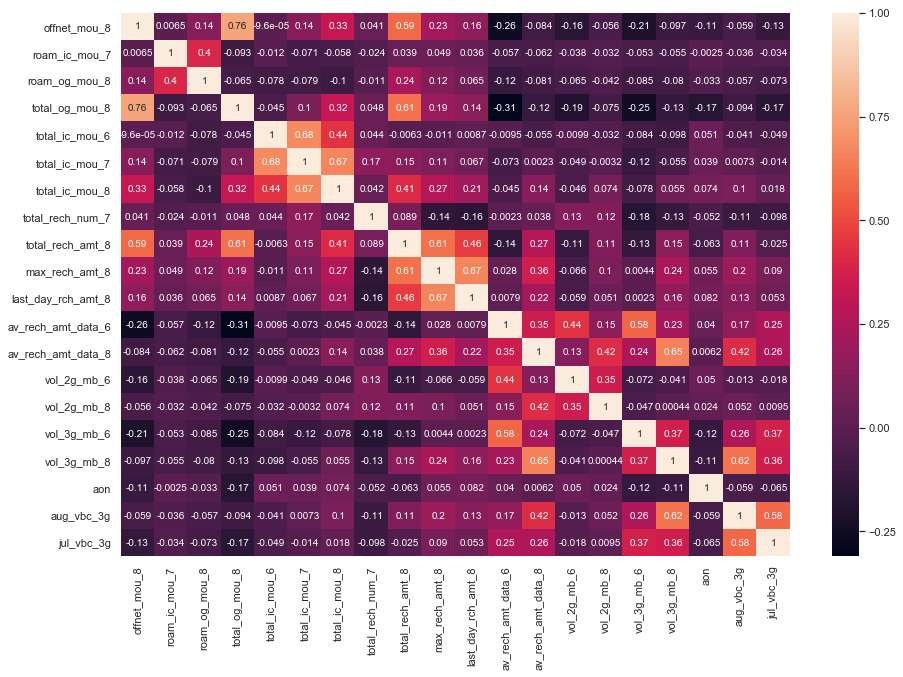

In [259]:
# Running RFE with 20 output variables
lr_rfe1,X_train_rfe1 = RFE_Model_StatsandVIF(20,X_train_res, y_train_res,'Yes')
#Let's see the summary of our linear model
print(lr_rfe1.fit().summary())
#Lets check the correlation of all columns
plt.figure(figsize = (15,10))        # Size of the figure
sns.heatmap(X_train_rfe1.corr(),annot = True)

##  Building Possible Suitable models

<b> Use p-value, VIF and Correlation matrix to decide on which variable can be removed. Only remove one variable at a time and build model again. </b>

                   Var   Vif
7     total_rech_amt_8  6.72
4       total_ic_mou_7  5.18
8       max_rech_amt_8  4.64
11  av_rech_amt_data_8  3.97
10  av_rech_amt_data_6  3.88
5       total_ic_mou_8  3.54
15         vol_3g_mb_8  3.45
3       total_ic_mou_6  3.30
0         offnet_mou_8  2.75
14         vol_3g_mb_6  2.68
9   last_day_rch_amt_8  2.54
17          aug_vbc_3g  2.52
6     total_rech_num_7  2.38
16                 aon  2.32
12         vol_2g_mb_6  2.01
18          jul_vbc_3g  1.98
13         vol_2g_mb_8  1.78
2        roam_og_mou_8  1.47
1        roam_ic_mou_7  1.26
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                38438
Model:                            GLM   Df Residuals:                    38418
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                  

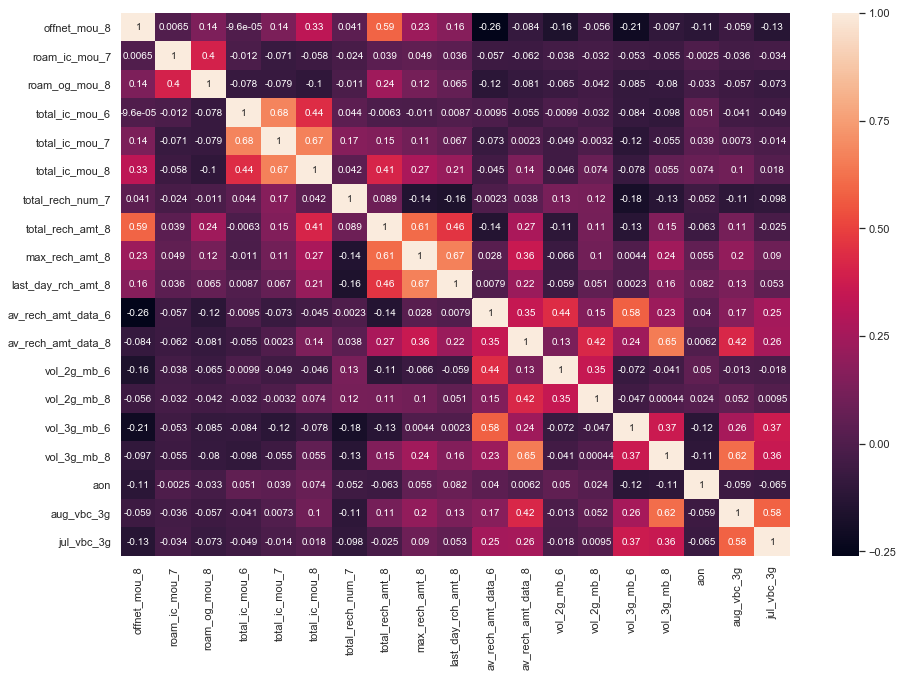

In [260]:
#Dropping off total_og_mou_8 - as it is correlated with other varaibles and having VIF of 5.70
X_train_model1 = X_train_rfe1.drop(columns=['total_og_mou_8'],axis=1)
#Building Model 1
lr_model1 = build_lr_model(X_train_model1, y_train_res, 'Yes')
print(lr_model1.fit().summary())
#Lets check the correlation of all columns
plt.figure(figsize = (15,10))        # Size of the figure
sns.heatmap(X_train_model1.corr(),annot = True)

                   Var   Vif
4       total_ic_mou_7  5.13
10  av_rech_amt_data_8  3.93
9   av_rech_amt_data_6  3.86
7       max_rech_amt_8  3.86
14         vol_3g_mb_8  3.44
5       total_ic_mou_8  3.33
3       total_ic_mou_6  3.30
13         vol_3g_mb_6  2.67
16          aug_vbc_3g  2.52
8   last_day_rch_amt_8  2.49
15                 aon  2.32
6     total_rech_num_7  2.16
11         vol_2g_mb_6  2.01
17          jul_vbc_3g  1.98
0         offnet_mou_8  1.92
12         vol_2g_mb_8  1.78
2        roam_og_mou_8  1.36
1        roam_ic_mou_7  1.26
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                38438
Model:                            GLM   Df Residuals:                    38419
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood

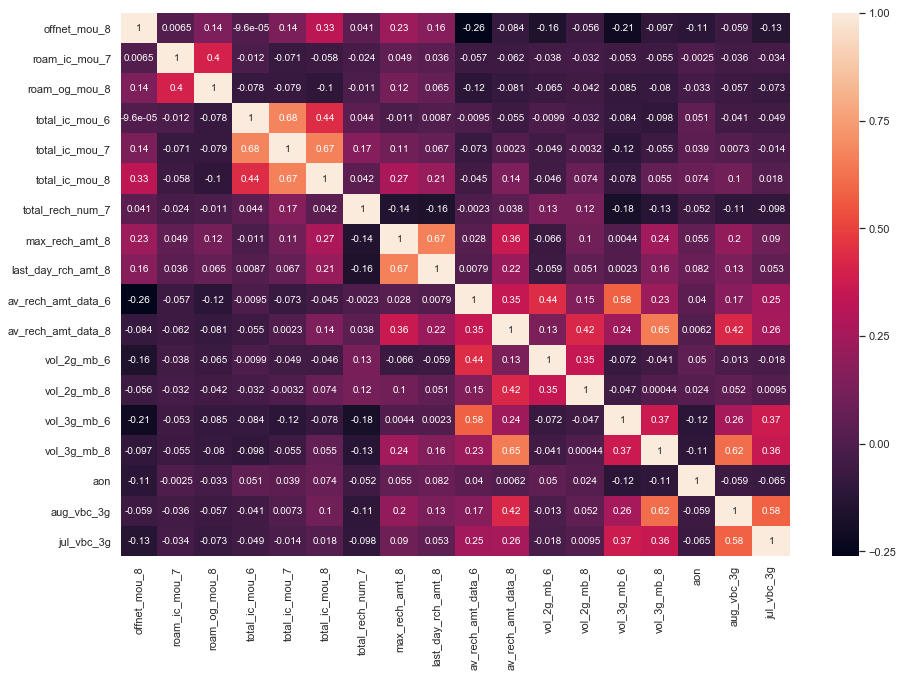

In [261]:
#Dropping off total_rech_amt_8 - as it is correlated with other varaibles and having VIF of 6.72
X_train_model2 = X_train_model1.drop(columns=['total_rech_amt_8'],axis=1)
#Building Model 2
lr_model2 = build_lr_model(X_train_model2, y_train_res, 'Yes')
print(lr_model2.fit().summary())
#Lets check the correlation of all columns
plt.figure(figsize = (15,10))        # Size of the figure
sns.heatmap(X_train_model2.corr(),annot = True)

                   Var   Vif
9   av_rech_amt_data_8  3.92
8   av_rech_amt_data_6  3.85
6       max_rech_amt_8  3.84
13         vol_3g_mb_8  3.44
12         vol_3g_mb_6  2.67
15          aug_vbc_3g  2.52
7   last_day_rch_amt_8  2.49
4       total_ic_mou_8  2.39
14                 aon  2.32
3       total_ic_mou_6  2.14
5     total_rech_num_7  2.02
10         vol_2g_mb_6  2.00
16          jul_vbc_3g  1.98
0         offnet_mou_8  1.91
11         vol_2g_mb_8  1.78
2        roam_og_mou_8  1.36
1        roam_ic_mou_7  1.25
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                38438
Model:                            GLM   Df Residuals:                    38420
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15982.
Date

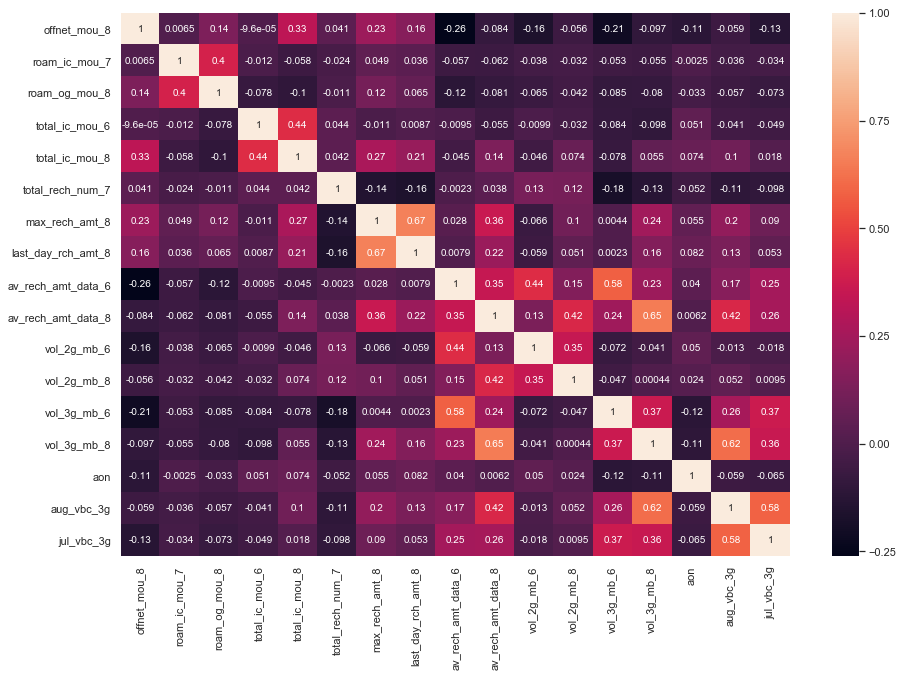

In [263]:
#Dropping off total_ic_mou_7 - as it is correlated with other varaibles and having VIF of 5.13
X_train_model3 = X_train_model2.drop(columns=['total_ic_mou_7'],axis=1)
#Building Model 3
lr_model3 = build_lr_model(X_train_model3, y_train_res, 'Yes')
print(lr_model3.fit().summary())
#Lets check the correlation of all columns
plt.figure(figsize = (15,10))        # Size of the figure
sns.heatmap(X_train_model3.corr(),annot = True)

                   Var   Vif
9   av_rech_amt_data_8  3.92
6       max_rech_amt_8  3.84
8   av_rech_amt_data_6  3.84
13         vol_3g_mb_8  3.42
12         vol_3g_mb_6  2.56
7   last_day_rch_amt_8  2.49
4       total_ic_mou_8  2.39
14                 aon  2.31
3       total_ic_mou_6  2.14
5     total_rech_num_7  2.01
10         vol_2g_mb_6  2.00
0         offnet_mou_8  1.91
15          aug_vbc_3g  1.88
11         vol_2g_mb_8  1.78
2        roam_og_mou_8  1.36
1        roam_ic_mou_7  1.25
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                38438
Model:                            GLM   Df Residuals:                    38421
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15984.
Date:                Sun, 18 Nov 

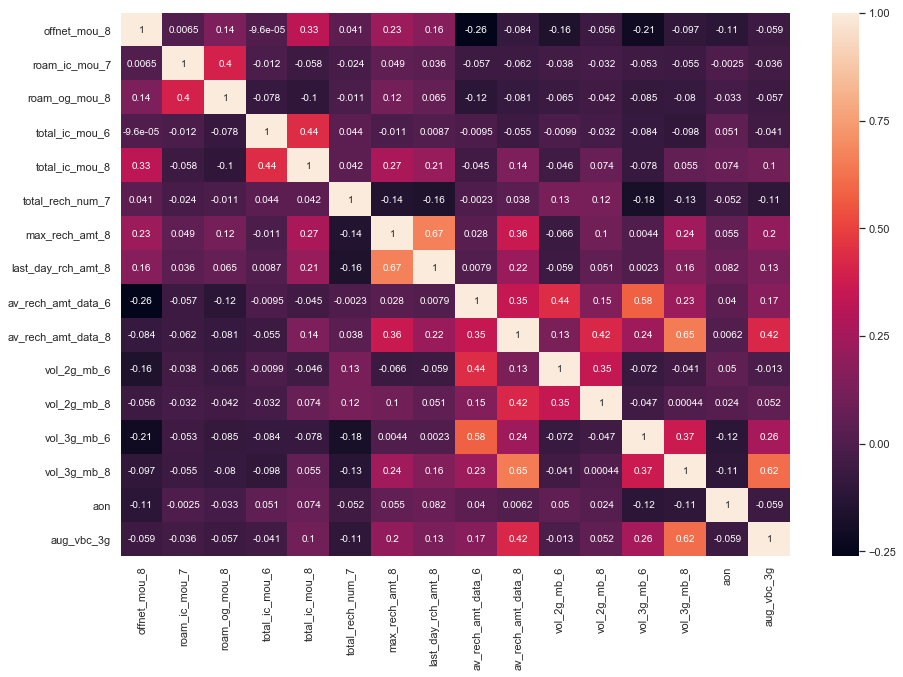

In [264]:
#Dropping off jul_vbc_3g column with high p-value of 0.128
X_train_model4 = X_train_model3.drop(columns=['jul_vbc_3g'],axis=1)
#Building Model 4
lr_model4 = build_lr_model(X_train_model4, y_train_res, 'Yes')
print(lr_model4.fit().summary())
#Lets check the correlation of all columns
plt.figure(figsize = (15,10))        # Size of the figure
sns.heatmap(X_train_model4.corr(),annot = True)

                   Var   Vif
9   av_rech_amt_data_8  3.84
6       max_rech_amt_8  3.83
12         vol_3g_mb_8  3.40
8   av_rech_amt_data_6  2.61
7   last_day_rch_amt_8  2.49
4       total_ic_mou_8  2.39
13                 aon  2.31
11         vol_3g_mb_6  2.15
3       total_ic_mou_6  2.14
5     total_rech_num_7  1.99
0         offnet_mou_8  1.91
14          aug_vbc_3g  1.88
10         vol_2g_mb_8  1.60
2        roam_og_mou_8  1.36
1        roam_ic_mou_7  1.25
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                38438
Model:                            GLM   Df Residuals:                    38422
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15985.
Date:                Sun, 18 Nov 2018   Deviance:             

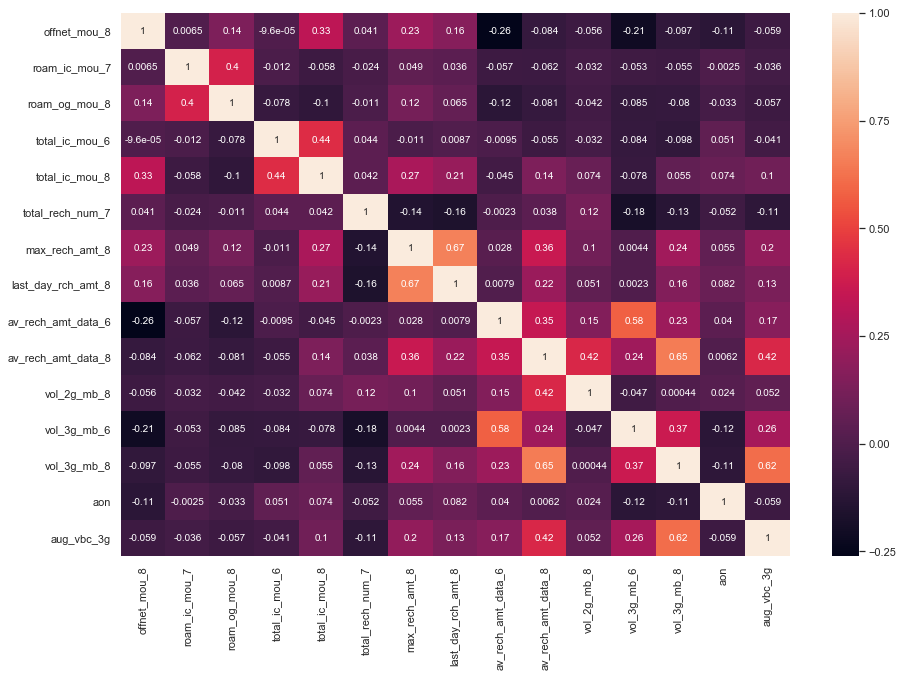

In [265]:
#Dropping off vol_2g_mb_6 column with high p-value of 0.074
X_train_model5 = X_train_model4.drop(columns=['vol_2g_mb_6'],axis=1)
#Building Model 5
lr_model5 = build_lr_model(X_train_model5, y_train_res, 'Yes')
print(lr_model5.fit().summary())
#Lets check the correlation of all columns
plt.figure(figsize = (15,10))        # Size of the figure
sns.heatmap(X_train_model5.corr(),annot = True)

                   Var   Vif
6       max_rech_amt_8  3.68
7   last_day_rch_amt_8  2.49
8   av_rech_amt_data_6  2.47
4       total_ic_mou_8  2.38
12                 aon  2.31
11         vol_3g_mb_8  2.15
3       total_ic_mou_6  2.13
10         vol_3g_mb_6  2.13
5     total_rech_num_7  1.98
0         offnet_mou_8  1.89
13          aug_vbc_3g  1.88
2        roam_og_mou_8  1.36
1        roam_ic_mou_7  1.25
9          vol_2g_mb_8  1.20
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                38438
Model:                            GLM   Df Residuals:                    38423
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16027.
Date:                Sun, 18 Nov 2018   Deviance:                       32053.
Time:       

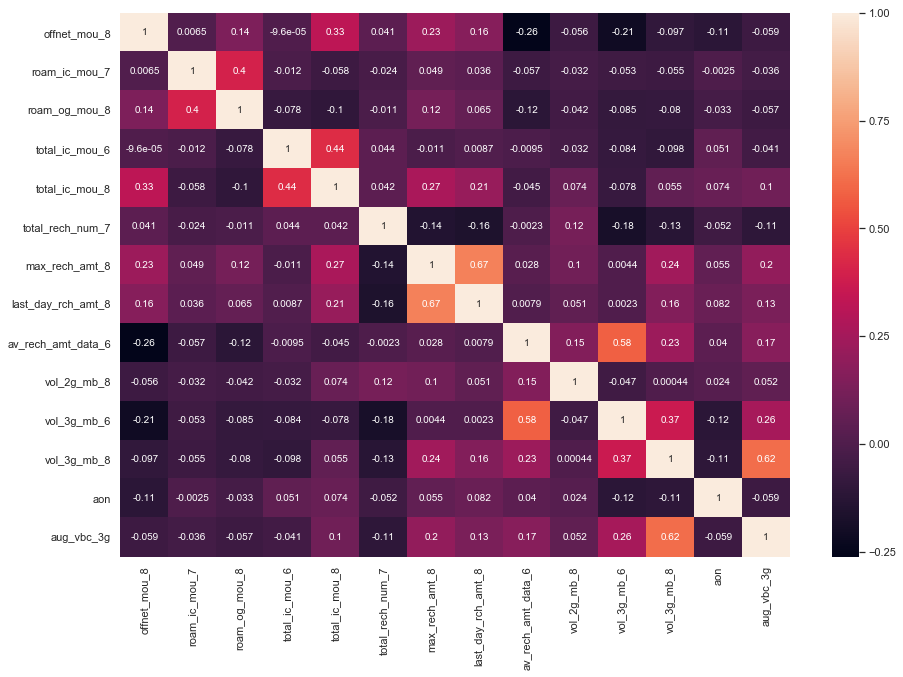

In [266]:
#Dropping off av_rech_amt_data_8 - as it is correlated with other variables and VIF of 3.84
X_train_model6 = X_train_model5.drop(columns=['av_rech_amt_data_8'],axis=1)
#Building Model 6
lr_model6 = build_lr_model(X_train_model6, y_train_res, 'Yes')
print(lr_model6.fit().summary())
#Lets check the correlation of all columns
plt.figure(figsize = (15,10))        # Size of the figure
sns.heatmap(X_train_model6.corr(),annot = True)

                   Var   Vif
7   av_rech_amt_data_6  2.46
4       total_ic_mou_8  2.34
11                 aon  2.25
3       total_ic_mou_6  2.13
9          vol_3g_mb_6  2.13
10         vol_3g_mb_8  2.08
5     total_rech_num_7  1.98
12          aug_vbc_3g  1.88
0         offnet_mou_8  1.82
6   last_day_rch_amt_8  1.53
2        roam_og_mou_8  1.34
1        roam_ic_mou_7  1.25
8          vol_2g_mb_8  1.19
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                38438
Model:                            GLM   Df Residuals:                    38424
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16043.
Date:                Sun, 18 Nov 2018   Deviance:                       32085.
Time:                        19:28:33   P

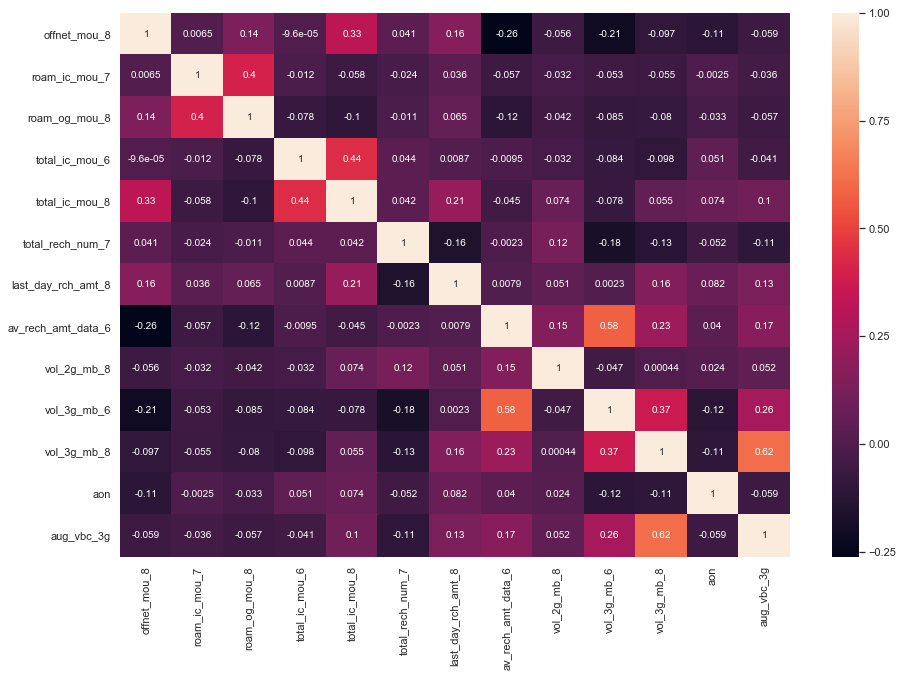

In [267]:
#Dropping off max_rech_amt_8 - since its correlated with other columns and having VIF of 3.68
X_train_model7 = X_train_model6.drop(columns=['max_rech_amt_8'],axis=1)
#Building Model 7
lr_model7 = build_lr_model(X_train_model7, y_train_res, 'Yes')
print(lr_model7.fit().summary())
#Lets check the correlation of all columns
plt.figure(figsize = (15,10))        # Size of the figure
sns.heatmap(X_train_model7.corr(),annot = True)

                   Var   Vif
7   av_rech_amt_data_6  2.46
4       total_ic_mou_8  2.33
11                 aon  2.25
3       total_ic_mou_6  2.13
9          vol_3g_mb_6  2.13
5     total_rech_num_7  1.98
0         offnet_mou_8  1.82
6   last_day_rch_amt_8  1.53
10         vol_3g_mb_8  1.41
2        roam_og_mou_8  1.34
1        roam_ic_mou_7  1.25
8          vol_2g_mb_8  1.18
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                38438
Model:                            GLM   Df Residuals:                    38425
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16129.
Date:                Sun, 18 Nov 2018   Deviance:                       32257.
Time:                        19:32:06   Pearson chi2:                 

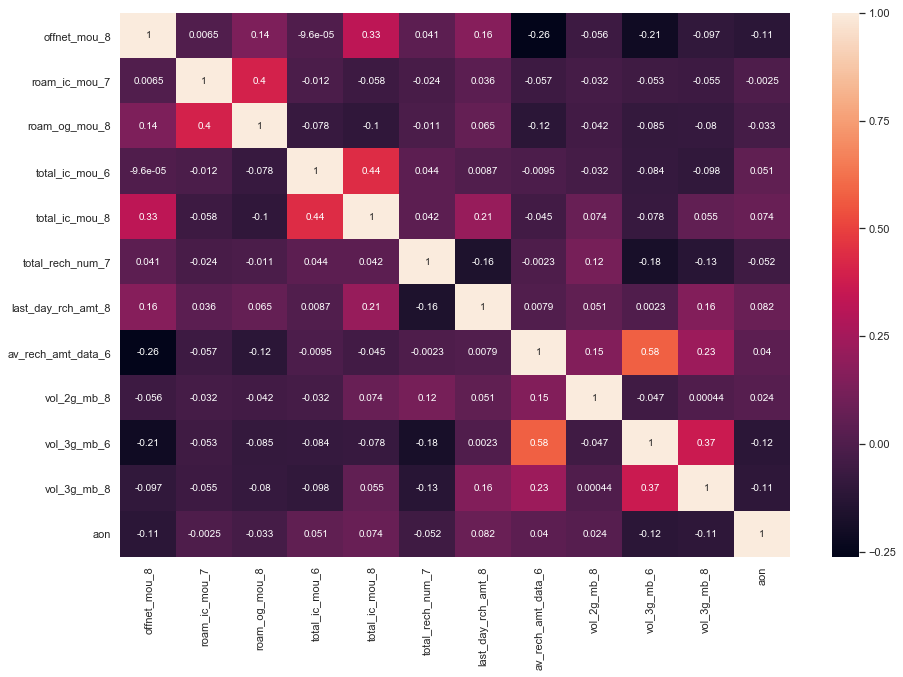

In [268]:
#Dropping off aug_vbc_3g - as it is correlated to vol3g_mb_8
X_train_model8 = X_train_model7.drop(columns=['aug_vbc_3g'],axis=1)
#Building Model 8
lr_model8 = build_lr_model(X_train_model8, y_train_res, 'Yes')
print(lr_model8.fit().summary())
#Lets check the correlation of all columns
plt.figure(figsize = (15,10))        # Size of the figure
sns.heatmap(X_train_model8.corr(),annot = True)

                   Var   Vif
7   av_rech_amt_data_6  2.46
4       total_ic_mou_8  2.34
10                 aon  2.25
3       total_ic_mou_6  2.12
9          vol_3g_mb_6  2.02
5     total_rech_num_7  1.97
0         offnet_mou_8  1.81
6   last_day_rch_amt_8  1.50
2        roam_og_mou_8  1.34
11          aug_vbc_3g  1.27
1        roam_ic_mou_7  1.25
8          vol_2g_mb_8  1.19
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                38438
Model:                            GLM   Df Residuals:                    38425
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16540.
Date:                Sun, 18 Nov 2018   Deviance:                       33080.
Time:                        19:33:35   Pearson chi2:                 

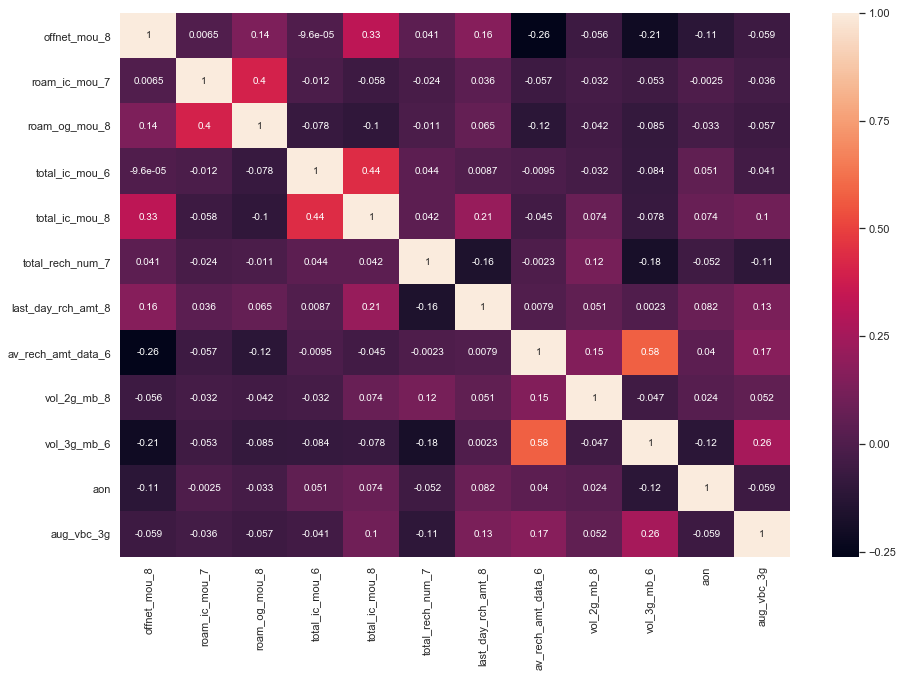

In [270]:
#Dropping off vol_3g_mb_8 - as it is correlated to aug_vbc_3g
X_train_model9 = X_train_model7.drop(columns=['vol_3g_mb_8'],axis=1)
#Building Model 9
lr_model9 = build_lr_model(X_train_model9, y_train_res, 'Yes')
print(lr_model9.fit().summary())
#Lets check the correlation of all columns
plt.figure(figsize = (15,10))        # Size of the figure
sns.heatmap(X_train_model9.corr(),annot = True)

 ## Using Model 8 and 9 for predictions on Training and Test data


Confusion Matrix
[[15404  3815]
 [ 3103 16116]]

Accuracy :  0.820021853374265

Sensitivity :  0.8385451896560695
Specificity :  0.8014985170924606


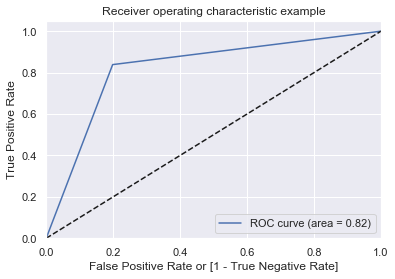

In [271]:
#Predicting the model 8 on training data
log_model8=LogisticRegression()
log_model8.fit(X_train_res[X_train_model8.columns], y_train_res)
y_test_pred=log_model8.predict(X_train_res[X_train_model8.columns])
#Model Evaluation Metrics - Model 8 - Training data
model_eval_metrics(y_train_res, y_test_pred)


Confusion Matrix
[[6674 1562]
 [ 142  590]]

Accuracy :  0.8099910793933988

Sensitivity :  0.8060109289617486
Specificity :  0.8103448275862069


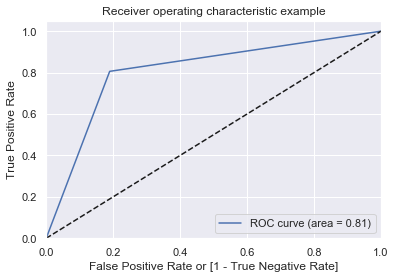

In [273]:
#Predicting the model 8 on test data
y_test_pred=log_model8.predict(Xtest[X_train_model8.columns])
#Model Evaluation Metrics - Model 8 - Test data
model_eval_metrics(y_test, y_test_pred)


Confusion Matrix
[[15134  4085]
 [ 3016 16203]]

Accuracy :  0.8152609396950934

Sensitivity :  0.8430719600395442
Specificity :  0.7874499193506426


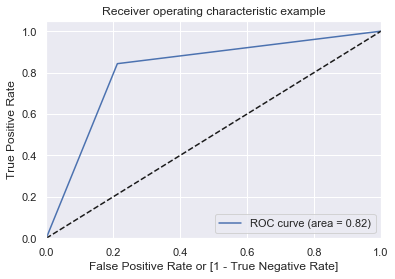

In [274]:
#Predicting the model 9 on training data
log_model9=LogisticRegression()
log_model9.fit(X_train_res[X_train_model9.columns], y_train_res)
y_test_pred=log_model9.predict(X_train_res[X_train_model9.columns])
#Model Evaluation Metrics - Model 9 - Training data
model_eval_metrics(y_train_res, y_test_pred)


Confusion Matrix
[[6581 1655]
 [ 138  594]]

Accuracy :  0.8000669045495094

Sensitivity :  0.8114754098360656
Specificity :  0.7990529383195726


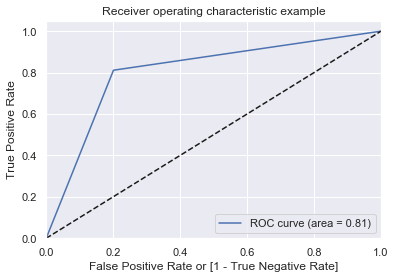

In [275]:
#Predicting the model 9 on test data
y_test_pred=log_model9.predict(Xtest[X_train_model9.columns])
#Model Evaluation Metrics - Model 9 - Test data
model_eval_metrics(y_test, y_test_pred)

 # Goal 2 - Conclusion
 
                                      Model 8		                              Model 9	
                                Training 	  Test data	                Training	     Test Data
				
               Sensitivity	     0.84	         0.81	                   0.84	          0.81
               Specificity	     0.80	         0.81	                   0.79	          0.80
             ROC_AUC_Score	     0.82	         0.81	                   0.82	          0.81
                  Accuracy	     0.82	         0.81	                   0.82	          0.80
                  
                  
 ### Since the business is more concerned about not losing the customers, We have to predict the churn customers correctly. A non-churn customer can be predicted as churn but a churn customer should not be predicted as non-churn. Considering this scenario and from the above metrics, we have to choose a model with high sensitivity, good specificity and good ROC_AUC_Score for predciting driver variables.
 
 ## <font color='green'>We chose Model 8 as the model gave good results on test data with good sensitivity, specificity and ROC_AUC_Score.</font>
 
 ## Driver Variables: 
 
 There are total 12 predictor variables that we have arrived at using Model 8.
 
 Following are driver variables impacting the customer churn, so the Operator can focus mainly on these to identify the High value customer churn in advance to avoid business loss.
<font color='red'> 

 -  av_rech_amt_data_6 : Average recharge amount customer has done for Mobile Internet for the Month 6.
 -  total_ic_mou_8 : Total incoming voice calls for the Month 8
 -  aon : Age on network which refers to the number of days the customer is using the operator T network
 -  last_day_rch_amt_8 : Last day Recharge Amount customer has done for the Month 8
 -  total_ic_mou_6 : Total incoming voice calls for the Month 6
 -  vol_3g_mb_6 : 3G Mobile internet usage in MB  for the Month 6
 -  total_rech_num_7 : Total number of recharges done for the Month 7
 -  offnet_mou_8 : All voice call outside the operator T network for the month 8
 -  vol_3g_mb_8 : 3G Mobile internet usage in MB  for the Month 8
 -  roam_og_mou_8 : Roaming outgoing voice calls for the Month 8
 -  roam_ic_mou_7 : Roaming incoming voice calls for the Month 7
 -  vol_2g_mb_8 : 2G Mobile internet usage in MB  for the Month 8</font>

 # <font color='green'>Final Conclusion:</font>
    
                     
Since the business is more concerned about not losing the customers, We have to predict the churn customers correctly. A non-churn customer can be predicted as churn but a churn customer should not be predicted as non-churn. Considering this business scenario, we have to choose a model with high sensitivity, good specificity and good ROC_AUC_Score.
 
## Goal 1 - To predict customers who will churn.
 
                                 Logistic Regression		                       SVM	
	                       Threshold>0.5	Threshold>0.4	           Kernel=Linear	Kernel=RBF
				
               Sensitivity	     0.79	         0.84	                   0.78	          0.78
               Specificity	     0.84	         0.77	                   0.85	          0.86
             ROC_AUC_Score	     0.81	         0.81	                   0.81	          0.82
                  Accuracy	     0.83	         0.78	                   0.84	          0.85
                  
                  
 ### <font color='green'>We chose Logistic Regression Model with CutOff Threshold as 0.4 as an appropriate model to predict customers who will churn. This model is having high sensitivity of 0.84, good specificity of 0.77 and good ROC_AUC_score of 0.81 when compared to other models.</font>
 
## Goal 2 - To identify Predictor variables impacting the customer churn.
 
  Following are 12 driver variables impacting the customer churn, so the Operator can focus mainly on these to identify the High value customer churn in advance to avoid business loss.
<font color='green'> 

 -  av_rech_amt_data_6 : Average recharge amount customer has done for Mobile Internet for the Month 6.
 -  total_ic_mou_8 : Total incoming voice calls for the Month 8
 -  aon : Age on network which refers to the number of days the customer is using the operator T network
 -  last_day_rch_amt_8 : Last day Recharge Amount customer has done for the Month 8
 -  total_ic_mou_6 : Total incoming voice calls for the Month 6
 -  vol_3g_mb_6 : 3G Mobile internet usage in MB  for the Month 6
 -  total_rech_num_7 : Total number of recharges done for the Month 7
 -  offnet_mou_8 : All voice call outside the operator T network for the month 8
 -  vol_3g_mb_8 : 3G Mobile internet usage in MB  for the Month 8
 -  roam_og_mou_8 : Roaming outgoing voice calls for the Month 8
 -  roam_ic_mou_7 : Roaming incoming voice calls for the Month 7
 -  vol_2g_mb_8 : 2G Mobile internet usage in MB  for the Month 8</font>